## Data Cleaning

In [2]:
# Import modules
import pandas as pd
from ast import literal_eval
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### TMDB Data

In [3]:
# Load dataset
tmdb_df = pd.read_csv('../acquisition/25k_tmdb_raw_data.csv')

In [4]:
tmdb_df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,success,status_code,status_message
0,False,/n7zm7vcZ5m2nSV9Scyh2axpY8d4.jpg,NaN,21000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.freedomwriters.com/,1646,tt0463998,en,Freedom Writers,...,False,7.924,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,/6dvpZbFu1VOCIcY1qToRHmj8Aaq.jpg,NaN,47000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.happilyneverafterthefilm.com/,5393,tt0308353,en,Happily N'Ever After,...,False,4.923,371,141084.0,Happily N'Ever After Collection,/aPjLYxKIBys6dlxXMZrDi8VowQK.jpg,/fw6YfVOmK0tVtaSUGb3GvLzEmvK.jpg,NaN,NaN,NaN
2,False,/52RD1oMub4E2lojzsuNMRNJNtco.jpg,NaN,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,14171,tt0763840,en,Home of the Brave,...,False,5.453,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,/cMMjICzBe5qTx1igspFYdX8B3o2.jpg,NaN,20000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,14396,tt0462229,en,Code Name: The Cleaner,...,False,5.100,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,/6d9zm4ds01BA2EmX8GmzNlmIvyi.jpg,NaN,13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,1931,tt0775539,en,Stomp the Yard,...,False,6.905,351,160727.0,Stomp the Yard Collection,/2qAqDHlxVS4wOf1Z8mBGpTgp7PB.jpg,/zuaYuIAgnCY7Y6nkSGGhPx8RlOV.jpg,NaN,NaN,NaN


In [5]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24936 entries, 0 to 24935
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                24936 non-null  bool   
 1   backdrop_path                        19996 non-null  object 
 2   belongs_to_collection                0 non-null      float64
 3   budget                               24936 non-null  int64  
 4   genres                               24936 non-null  object 
 5   homepage                             9056 non-null   object 
 6   id                                   24936 non-null  int64  
 7   imdb_id                              24936 non-null  object 
 8   original_language                    24936 non-null  object 
 9   original_title                       24936 non-null  object 
 10  overview                             24733 non-null  object 
 11  popularity                  

In [6]:
# only taking the columns needed
tmdb_df = tmdb_df[['original_title','imdb_id','genres','release_date','revenue','runtime','vote_average','original_language']]

In [7]:
tmdb_df.head()

,original_title,imdb_id,genres,release_date,revenue,runtime,vote_average,original_language
0,Freedom Writers,tt0463998,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",2007-01-05,43095175,123,7.924,en
1,Happily N'Ever After,tt0308353,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",2007-01-05,38085778,87,4.923,en
2,Home of the Brave,tt0763840,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",2006-12-15,499620,106,5.453,en
3,Code Name: The Cleaner,tt0462229,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",2007-01-05,10337477,84,5.100,en
4,Stomp the Yard,tt0775539,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",2007-05-16,75511123,114,6.905,en


In [8]:
# converting the genres column to be a string from a list so that it can be exploded
tmdb_df['genres'] = tmdb_df['genres'].apply(literal_eval)

In [9]:
tmdb_df.head()

,original_title,imdb_id,genres,release_date,revenue,runtime,vote_average,original_language
0,Freedom Writers,tt0463998,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",2007-01-05,43095175,123,7.924,en
1,Happily N'Ever After,tt0308353,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",2007-01-05,38085778,87,4.923,en
2,Home of the Brave,tt0763840,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",2006-12-15,499620,106,5.453,en
3,Code Name: The Cleaner,tt0462229,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",2007-01-05,10337477,84,5.100,en
4,Stomp the Yard,tt0775539,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",2007-05-16,75511123,114,6.905,en


In [10]:
genres_only = tmdb_df.explode('genres')

In [11]:
genres_only.head()

,original_title,imdb_id,genres,release_date,revenue,runtime,vote_average,original_language
0,Freedom Writers,tt0463998,"{'id': 80, 'name': 'Crime'}",2007-01-05,43095175,123,7.924,en
0,Freedom Writers,tt0463998,"{'id': 18, 'name': 'Drama'}",2007-01-05,43095175,123,7.924,en
1,Happily N'Ever After,tt0308353,"{'id': 12, 'name': 'Adventure'}",2007-01-05,38085778,87,4.923,en
1,Happily N'Ever After,tt0308353,"{'id': 16, 'name': 'Animation'}",2007-01-05,38085778,87,4.923,en
1,Happily N'Ever After,tt0308353,"{'id': 35, 'name': 'Comedy'}",2007-01-05,38085778,87,4.923,en


In [12]:
# retrieving genres from the 'genres' dict
genres_only = genres_only['genres'].apply(pd.Series)

In [13]:
genres_only.head(10)

,id,name,0
0,80.0,Crime,NaN
0,18.0,Drama,NaN
1,12.0,Adventure,NaN
1,16.0,Animation,NaN
1,35.0,Comedy,NaN
1,10751.0,Family,NaN
1,14.0,Fantasy,NaN
2,18.0,Drama,NaN
2,10752.0,War,NaN
3,28.0,Action,NaN


In [14]:
# merging with main df to get values for merging later
genres_only = pd.merge(tmdb_df, genres_only, left_index=True, right_index=True)

In [15]:
genres_only = genres_only[['original_title','imdb_id','name']]
genres_only.rename(columns={'name':'genre'}, inplace=True)

In [16]:
genres_only.head(10)

,original_title,imdb_id,genre
0,Freedom Writers,tt0463998,Crime
0,Freedom Writers,tt0463998,Drama
1,Happily N'Ever After,tt0308353,Adventure
1,Happily N'Ever After,tt0308353,Animation
1,Happily N'Ever After,tt0308353,Comedy
1,Happily N'Ever After,tt0308353,Family
1,Happily N'Ever After,tt0308353,Fantasy
2,Home of the Brave,tt0763840,Drama
2,Home of the Brave,tt0763840,War
3,Code Name: The Cleaner,tt0462229,Action


In [17]:
# bringing genres back to a single row
genres_only = genres_only['genre'].groupby([genres_only['original_title'],genres_only['imdb_id']]).apply(list).reset_index()

In [18]:
genres_only.head()

,original_title,imdb_id,genre
0,#1 Cheerleader Camp,tt1637976,[Comedy]
1,#Captured,tt6856592,"[Horror, Thriller]"
2,#Female Pleasure,tt8372826,[Documentary]
3,#FollowMe,tt7272948,"[Horror, Thriller]"
4,#Horror,tt3526286,"[Drama, Mystery, Horror, Thriller]"


In [19]:
# splitting genres into their own columns
genres_merging = pd.DataFrame([pd.Series(x) for x in genres_only['genre']])
genres_merging.columns = ['genre_{}'.format(x+1) for x in genres_merging.columns]

In [20]:
genres_merging

,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
0,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Horror,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Drama,Mystery,Horror,Thriller,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
24921,Drama,Romance,History,NaN,NaN,NaN,NaN,NaN,NaN
24922,Drama,Thriller,Crime,NaN,NaN,NaN,NaN,NaN,NaN
24923,Drama,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24924,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# bringing genre dataframes together to merge back to our main df
genres_merging = pd.concat([genres_only, genres_merging], axis=1)

In [22]:
genres_merging.head(10)

,original_title,imdb_id,genre,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
0,#1 Cheerleader Camp,tt1637976,[Comedy],Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#Captured,tt6856592,"[Horror, Thriller]",Horror,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#Female Pleasure,tt8372826,[Documentary],Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#FollowMe,tt7272948,"[Horror, Thriller]",Horror,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#Horror,tt3526286,"[Drama, Mystery, Horror, Thriller]",Drama,Mystery,Horror,Thriller,NaN,NaN,NaN,NaN,NaN
5,#LuckyNumber,tt2538204,[Comedy],Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,#SCREAMERS,tt5531032,[Horror],Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,#SquadGoals,tt6540984,"[Drama, Thriller]",Drama,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,#Stuck,tt2075318,"[Comedy, Drama, Romance]",Comedy,Drama,Romance,NaN,NaN,NaN,NaN,NaN,NaN
9,#realityhigh,tt6119504,[Comedy],Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# merging genres into original df
tmdb_df = pd.merge(tmdb_df, genres_merging, left_on=['imdb_id','original_title'], right_on=['imdb_id','original_title'])

In [24]:
tmdb_df.drop(columns=['genre','genres'], inplace=True)

In [25]:
tmdb_df.head()

,original_title,imdb_id,release_date,revenue,runtime,vote_average,original_language,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
0,Freedom Writers,tt0463998,2007-01-05,43095175,123,7.924,en,Crime,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Happily N'Ever After,tt0308353,2007-01-05,38085778,87,4.923,en,Adventure,Animation,Comedy,Family,Fantasy,NaN,NaN,NaN,NaN
2,Home of the Brave,tt0763840,2006-12-15,499620,106,5.453,en,Drama,War,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Code Name: The Cleaner,tt0462229,2007-01-05,10337477,84,5.100,en,Action,Comedy,Crime,NaN,NaN,NaN,NaN,NaN,NaN
4,Stomp the Yard,tt0775539,2007-05-16,75511123,114,6.905,en,Drama,Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24936 entries, 0 to 24935
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     24936 non-null  object 
 1   imdb_id            24936 non-null  object 
 2   release_date       24934 non-null  object 
 3   revenue            24936 non-null  int64  
 4   runtime            24936 non-null  int64  
 5   vote_average       24936 non-null  float64
 6   original_language  24936 non-null  object 
 7   genre_1            24552 non-null  object 
 8   genre_2            15273 non-null  object 
 9   genre_3            7249 non-null   object 
 10  genre_4            1996 non-null   object 
 11  genre_5            419 non-null    object 
 12  genre_6            96 non-null     object 
 13  genre_7            15 non-null     object 
 14  genre_8            2 non-null      object 
 15  genre_9            1 non-null      object 
dtypes: float64(1), int64(2

In [27]:
# converting release date to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [28]:
# splitting date into year and month
tmdb_df['Year'] = tmdb_df['release_date'].dt.strftime('%Y')
tmdb_df['Month'] = tmdb_df['release_date'].dt.strftime('%m')

In [29]:
tmdb_df

,original_title,imdb_id,release_date,revenue,runtime,vote_average,original_language,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Year,Month
0,Freedom Writers,tt0463998,2007-01-05,43095175,123,7.924,en,Crime,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,01
1,Happily N'Ever After,tt0308353,2007-01-05,38085778,87,4.923,en,Adventure,Animation,Comedy,Family,Fantasy,NaN,NaN,NaN,NaN,2007,01
2,Home of the Brave,tt0763840,2006-12-15,499620,106,5.453,en,Drama,War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,12
3,Code Name: The Cleaner,tt0462229,2007-01-05,10337477,84,5.100,en,Action,Comedy,Crime,NaN,NaN,NaN,NaN,NaN,NaN,2007,01
4,Stomp the Yard,tt0775539,2007-05-16,75511123,114,6.905,en,Drama,Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,決勝時刻,tt10551150,2019-09-20,15030400,0,5.700,zh,History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,09
24932,ハッピーフライト,tt1156447,2008-11-15,14160032,103,5.800,ja,Comedy,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,11
24933,சந்தோஷ் சுப்ரமணியம்,tt1382339,2008-04-11,0,177,7.024,ta,Comedy,Romance,Family,NaN,NaN,NaN,NaN,NaN,NaN,2008,04
24934,Wij,tt6671244,2018-07-12,0,100,5.800,nl,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,07


In [30]:
# adjusting vote_average
tmdb_df['vote_average'] = tmdb_df['vote_average'] * 10

In [31]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24936 entries, 0 to 24935
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_title     24936 non-null  object        
 1   imdb_id            24936 non-null  object        
 2   release_date       24934 non-null  datetime64[ns]
 3   revenue            24936 non-null  int64         
 4   runtime            24936 non-null  int64         
 5   vote_average       24936 non-null  float64       
 6   original_language  24936 non-null  object        
 7   genre_1            24552 non-null  object        
 8   genre_2            15273 non-null  object        
 9   genre_3            7249 non-null   object        
 10  genre_4            1996 non-null   object        
 11  genre_5            419 non-null    object        
 12  genre_6            96 non-null     object        
 13  genre_7            15 non-null     object        
 14  genre_

In [32]:
# checking for & deleting duplicates
tmdb_df[tmdb_df.duplicated(keep=False)]

,original_title,imdb_id,release_date,revenue,runtime,vote_average,original_language,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Year,Month
741,Blackout,tt1180333,2008-12-26,0,108,50.00,fi,Thriller,Mystery,Thriller,Mystery,Thriller,Mystery,NaN,NaN,NaN,2008,12
742,Blackout,tt1180333,2008-12-26,0,108,50.00,fi,Thriller,Mystery,Thriller,Mystery,Thriller,Mystery,NaN,NaN,NaN,2008,12
743,Blackout,tt1180333,2008-12-26,0,108,50.00,fi,Thriller,Mystery,Thriller,Mystery,Thriller,Mystery,NaN,NaN,NaN,2008,12
761,Fuel,tt1072437,2009-01-01,0,95,70.00,en,Drama,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,01
762,Fuel,tt1072437,2009-01-01,0,95,70.00,en,Drama,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,01
809,Berlin Calling,tt0211946,2008-10-01,0,105,68.26,de,Comedy,Drama,Music,Comedy,Drama,Music,NaN,NaN,NaN,2008,10
810,Berlin Calling,tt0211946,2008-10-01,0,105,68.26,de,Comedy,Drama,Music,Comedy,Drama,Music,NaN,NaN,NaN,2008,10
1039,Deal,tt0446676,2008-01-29,0,85,54.36,en,Comedy,Drama,Comedy,Drama,NaN,NaN,NaN,NaN,NaN,2008,01
1040,Deal,tt0446676,2008-01-29,0,85,54.36,en,Comedy,Drama,Comedy,Drama,NaN,NaN,NaN,NaN,NaN,2008,01
2322,Broderskab,tt1327820,2009-10-21,0,90,72.00,da,Drama,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,10


In [33]:
tmdb_df.drop_duplicates(keep='first',inplace=True)

In [34]:
tmdb_df[tmdb_df.duplicated(keep=False)]

,original_title,imdb_id,release_date,revenue,runtime,vote_average,original_language,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Year,Month


In [35]:
# there shouldn't be any null movie titles but double checking just in case
tmdb_df[tmdb_df['original_title'].isna()]

,original_title,imdb_id,release_date,revenue,runtime,vote_average,original_language,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Year,Month


In [36]:
# exporting cleaned dataframe
tmdb_df.to_csv('25k_tmdb_df_cleaned.csv', index=False)

### OMDB Data

In [38]:
# Load dataset
omdb_df = pd.read_csv('../acquisition/25k_omdb_raw_data.csv')

In [39]:
omdb_df.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Season,Episode,seriesID
0,Freedom Writers,2007,PG-13,05 Jan 2007,123 min,"Biography, Crime, Drama",Richard LaGravenese,"Richard LaGravenese, Freedom Writers, Erin Gru...","Hilary Swank, Imelda Staunton, Patrick Dempsey",A young teacher inspires her class of at-risk ...,...,movie,17 Apr 2007,"$36,605,602",NaN,NaN,True,NaN,NaN,NaN,NaN
1,Happily N'Ever After,2006,PG,05 Jan 2007,87 min,"Animation, Adventure, Comedy","Paul Bolger, Yvette Kaplan, Greg Tiernan","Robert Moreland, Doug Langdale, Andre Sikojev","Sigourney Weaver, Sarah Michelle Gellar, Patri...","An alliance of evil-doers, led by Frieda, look...",...,movie,01 May 2007,"$15,589,393",NaN,NaN,True,NaN,NaN,NaN,NaN
2,Home of the Brave,2006,R,05 Jan 2007,106 min,"Action, Drama, War",Irwin Winkler,"Mark Friedman, Irwin Winkler","Samuel L. Jackson, 50 Cent, Jessica Biel",Three soldiers struggle to readjust to life at...,...,movie,23 Oct 2007,"$51,708",NaN,NaN,True,NaN,NaN,NaN,NaN
3,Code Name: The Cleaner,2007,PG-13,05 Jan 2007,84 min,"Action, Comedy, Crime",Les Mayfield,"Robert Adetuyi, George Gallo","Cedric the Entertainer, Lucy Liu, Nicollette S...",An amnesiac wakes up in a hotel room next to a...,...,movie,24 Apr 2007,"$8,135,024",NaN,NaN,True,NaN,NaN,NaN,NaN
4,Stomp the Yard,2007,PG-13,12 Jan 2007,115 min,"Drama, Music, Romance",Sylvain White,"Robert Adetuyi, Gregory Ramon Anderson","Columbus Short, Meagan Good, Ne-Yo","When his brother is murdered, a street dancer ...",...,movie,15 May 2007,"$61,356,221",NaN,NaN,True,NaN,NaN,NaN,NaN


In [40]:
omdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24932 entries, 0 to 24931
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         24932 non-null  object 
 1   Year          24932 non-null  object 
 2   Rated         16655 non-null  object 
 3   Released      24428 non-null  object 
 4   Runtime       24824 non-null  object 
 5   Genre         24921 non-null  object 
 6   Director      24828 non-null  object 
 7   Writer        23124 non-null  object 
 8   Actors        24383 non-null  object 
 9   Plot          24711 non-null  object 
 10  Language      24641 non-null  object 
 11  Country       24343 non-null  object 
 12  Awards        16416 non-null  object 
 13  Poster        24846 non-null  object 
 14  Ratings       24932 non-null  object 
 15  Metascore     7841 non-null   float64
 16  imdbRating    24820 non-null  float64
 17  imdbVotes     24898 non-null  object 
 18  imdbID        24932 non-nu

In [41]:
# dropping unnecessary columns
omdb_df.drop(columns=['Released','Runtime','Writer','Plot','Awards','Poster',
                      'imdbVotes','Type','DVD','Production','Website',
                      'Response','Season','Episode','seriesID','totalSeasons'], inplace=True)

In [42]:
omdb_df.head()

,Title,Year,Rated,Genre,Director,Actors,Language,Country,Ratings,Metascore,imdbRating,imdbID,BoxOffice
0,Freedom Writers,2007,PG-13,"Biography, Crime, Drama",Richard LaGravenese,"Hilary Swank, Imelda Staunton, Patrick Dempsey","English, Spanish","Germany, United States","[{'Source': 'Internet Movie Database', 'Value'...",64.0,7.6,tt0463998,"$36,605,602"
1,Happily N'Ever After,2006,PG,"Animation, Adventure, Comedy","Paul Bolger, Yvette Kaplan, Greg Tiernan","Sigourney Weaver, Sarah Michelle Gellar, Patri...",English,"United States, Germany, Canada, United Kingdom...","[{'Source': 'Internet Movie Database', 'Value'...",28.0,4.5,tt0308353,"$15,589,393"
2,Home of the Brave,2006,R,"Action, Drama, War",Irwin Winkler,"Samuel L. Jackson, 50 Cent, Jessica Biel","English, Spanish, Arabic","United States, Morocco","[{'Source': 'Internet Movie Database', 'Value'...",42.0,5.6,tt0763840,"$51,708"
3,Code Name: The Cleaner,2007,PG-13,"Action, Comedy, Crime",Les Mayfield,"Cedric the Entertainer, Lucy Liu, Nicollette S...",English,United States,"[{'Source': 'Internet Movie Database', 'Value'...",33.0,4.6,tt0462229,"$8,135,024"
4,Stomp the Yard,2007,PG-13,"Drama, Music, Romance",Sylvain White,"Columbus Short, Meagan Good, Ne-Yo",English,United States,"[{'Source': 'Internet Movie Database', 'Value'...",44.0,5.4,tt0775539,"$61,356,221"


### Cleaning ratings

In [43]:
# want to get ratings data
omdb_df['Ratings'] = omdb_df['Ratings'].apply(literal_eval)

In [44]:
ratings_only = omdb_df.explode('Ratings')

In [45]:
# retrieving only ratings
ratings_only = ratings_only['Ratings'].apply(pd.Series)

In [46]:
ratings_only.head()

,Source,Value,0
0,Internet Movie Database,7.6/10,NaN
0,Rotten Tomatoes,70%,NaN
0,Metacritic,64/100,NaN
1,Internet Movie Database,4.5/10,NaN
1,Rotten Tomatoes,5%,NaN


In [47]:
# merging with main df to get values for merging later
ratings_only = pd.merge(omdb_df, ratings_only, left_index=True, right_index=True)

In [48]:
ratings_only = ratings_only[['Title','imdbID','Source','Value']]

In [49]:
ratings_only.rename(columns={'Source':'Rating_Source','Value':'Rating_Value'}, inplace=True)

In [50]:
ratings_only.head()

,Title,imdbID,Rating_Source,Rating_Value
0,Freedom Writers,tt0463998,Internet Movie Database,7.6/10
0,Freedom Writers,tt0463998,Rotten Tomatoes,70%
0,Freedom Writers,tt0463998,Metacritic,64/100
1,Happily N'Ever After,tt0308353,Internet Movie Database,4.5/10
1,Happily N'Ever After,tt0308353,Rotten Tomatoes,5%


In [51]:
ratings_only['IMDB_Value'] = 0
ratings_only['RT_Value'] = 0
ratings_only['MC_Value'] = 0

In [52]:
ratings_only

,Title,imdbID,Rating_Source,Rating_Value,IMDB_Value,RT_Value,MC_Value
0,Freedom Writers,tt0463998,Internet Movie Database,7.6/10,0,0,0
0,Freedom Writers,tt0463998,Rotten Tomatoes,70%,0,0,0
0,Freedom Writers,tt0463998,Metacritic,64/100,0,0,0
1,Happily N'Ever After,tt0308353,Internet Movie Database,4.5/10,0,0,0
1,Happily N'Ever After,tt0308353,Rotten Tomatoes,5%,0,0,0
...,...,...,...,...,...,...,...
24927,Mao Zedong 1949,tt10551150,Internet Movie Database,5.8/10,0,0,0
24928,Happy Flight,tt1156447,Internet Movie Database,6.5/10,0,0,0
24929,Santhosh Subramaniyam,tt1382339,Internet Movie Database,7.4/10,0,0,0
24930,Wij,tt6671244,Internet Movie Database,5.6/10,0,0,0


In [53]:
ratings_only.loc[ratings_only['Rating_Source'] == 'Internet Movie Database', 'IMDB_Value']

0        0
1        0
2        0
3        0
4        0
        ..
24927    0
24928    0
24929    0
24930    0
24931    0
Name: IMDB_Value, Length: 24820, dtype: int64

In [54]:
# assigning ratings based on their source
ratings_only['IMDB_Value'] = ratings_only[['Rating_Value']].loc[ratings_only['Rating_Source'] == 'Internet Movie Database']
ratings_only['RT_Value'] = ratings_only[['Rating_Value']].loc[ratings_only['Rating_Source'] == 'Rotten Tomatoes']
ratings_only['MC_Value'] = ratings_only[['Rating_Value']].loc[ratings_only['Rating_Source'] == 'Metacritic']

In [55]:
ratings_only.drop(columns=['Rating_Source','Rating_Value'], inplace=True)

In [56]:
ratings_only.drop_duplicates(keep='first',inplace=True)

In [57]:
ratings_only.head()

,Title,imdbID,IMDB_Value,RT_Value,MC_Value
0,Freedom Writers,tt0463998,7.6/10,70%,64/100
1,Happily N'Ever After,tt0308353,4.5/10,5%,28/100
2,Home of the Brave,tt0763840,5.6/10,22%,42/100
3,Code Name: The Cleaner,tt0462229,4.6/10,4%,33/100
4,Stomp the Yard,tt0775539,5.4/10,25%,44/100


In [58]:
# adjusting/scaling ratings

In [59]:
imdb_ratings = ratings_only['IMDB_Value'].str.split('/', expand=True)

In [60]:
imdb_ratings[0]

0        7.6
1        4.5
2        5.6
3        4.6
4        5.4
        ... 
24927    5.8
24928    6.5
24929    7.4
24930    5.6
24931    7.5
Name: 0, Length: 24922, dtype: object

In [61]:
ratings_only['IMDB_Value'] = imdb_ratings[0].astype(float) * 10

In [62]:
ratings_only

,Title,imdbID,IMDB_Value,RT_Value,MC_Value
0,Freedom Writers,tt0463998,76.0,70%,64/100
1,Happily N'Ever After,tt0308353,45.0,5%,28/100
2,Home of the Brave,tt0763840,56.0,22%,42/100
3,Code Name: The Cleaner,tt0462229,46.0,4%,33/100
4,Stomp the Yard,tt0775539,54.0,25%,44/100
...,...,...,...,...,...
24927,Mao Zedong 1949,tt10551150,58.0,NaN,NaN
24928,Happy Flight,tt1156447,65.0,NaN,NaN
24929,Santhosh Subramaniyam,tt1382339,74.0,NaN,NaN
24930,Wij,tt6671244,56.0,NaN,NaN


In [63]:
mc_ratings = ratings_only['MC_Value'].str.split('/', expand=True)
ratings_only['MC_Value'] = mc_ratings[0].astype(float)

In [64]:
rt_ratings = ratings_only['RT_Value'].str.split('%', expand=True)
ratings_only['RT_Value'] = rt_ratings[0].astype(float)

In [65]:
ratings_only.head()

,Title,imdbID,IMDB_Value,RT_Value,MC_Value
0,Freedom Writers,tt0463998,76.0,70.0,64.0
1,Happily N'Ever After,tt0308353,45.0,5.0,28.0
2,Home of the Brave,tt0763840,56.0,22.0,42.0
3,Code Name: The Cleaner,tt0462229,46.0,4.0,33.0
4,Stomp the Yard,tt0775539,54.0,25.0,44.0


In [66]:
# merging into original df
omdb_df = pd.merge(omdb_df, ratings_only, left_on=['Title','imdbID'], right_on=['Title','imdbID'])

In [67]:
omdb_df.drop(columns=['Ratings','Metascore','imdbRating'], inplace=True)

In [68]:
omdb_df.head()

,Title,Year,Rated,Genre,Director,Actors,Language,Country,imdbID,BoxOffice,IMDB_Value,RT_Value,MC_Value
0,Freedom Writers,2007,PG-13,"Biography, Crime, Drama",Richard LaGravenese,"Hilary Swank, Imelda Staunton, Patrick Dempsey","English, Spanish","Germany, United States",tt0463998,"$36,605,602",76.0,70.0,64.0
1,Happily N'Ever After,2006,PG,"Animation, Adventure, Comedy","Paul Bolger, Yvette Kaplan, Greg Tiernan","Sigourney Weaver, Sarah Michelle Gellar, Patri...",English,"United States, Germany, Canada, United Kingdom...",tt0308353,"$15,589,393",45.0,5.0,28.0
2,Home of the Brave,2006,R,"Action, Drama, War",Irwin Winkler,"Samuel L. Jackson, 50 Cent, Jessica Biel","English, Spanish, Arabic","United States, Morocco",tt0763840,"$51,708",56.0,22.0,42.0
3,Code Name: The Cleaner,2007,PG-13,"Action, Comedy, Crime",Les Mayfield,"Cedric the Entertainer, Lucy Liu, Nicollette S...",English,United States,tt0462229,"$8,135,024",46.0,4.0,33.0
4,Stomp the Yard,2007,PG-13,"Drama, Music, Romance",Sylvain White,"Columbus Short, Meagan Good, Ne-Yo",English,United States,tt0775539,"$61,356,221",54.0,25.0,44.0


### Cleaning actors

In [69]:
actors_df = omdb_df['Actors'].str.split(',', expand=True)

In [70]:
actors_df.head()

,0,1,2,3
0,Hilary Swank,Imelda Staunton,Patrick Dempsey,None
1,Sigourney Weaver,Sarah Michelle Gellar,Patrick Warburton,None
2,Samuel L. Jackson,50 Cent,Jessica Biel,None
3,Cedric the Entertainer,Lucy Liu,Nicollette Sheridan,None
4,Columbus Short,Meagan Good,Ne-Yo,None


In [71]:
actors_df.columns = ['Actor_{}'.format(x+1) for x in actors_df.columns]

In [72]:
actors_df.head()

,Actor_1,Actor_2,Actor_3,Actor_4
0,Hilary Swank,Imelda Staunton,Patrick Dempsey,None
1,Sigourney Weaver,Sarah Michelle Gellar,Patrick Warburton,None
2,Samuel L. Jackson,50 Cent,Jessica Biel,None
3,Cedric the Entertainer,Lucy Liu,Nicollette Sheridan,None
4,Columbus Short,Meagan Good,Ne-Yo,None


In [73]:
omdb_df = pd.merge(omdb_df, actors_df, left_index=True, right_index=True)
omdb_df.drop(columns='Actors', inplace=True)
omdb_df.head()

,Title,Year,Rated,Genre,Director,Language,Country,imdbID,BoxOffice,IMDB_Value,RT_Value,MC_Value,Actor_1,Actor_2,Actor_3,Actor_4
0,Freedom Writers,2007,PG-13,"Biography, Crime, Drama",Richard LaGravenese,"English, Spanish","Germany, United States",tt0463998,"$36,605,602",76.0,70.0,64.0,Hilary Swank,Imelda Staunton,Patrick Dempsey,None
1,Happily N'Ever After,2006,PG,"Animation, Adventure, Comedy","Paul Bolger, Yvette Kaplan, Greg Tiernan",English,"United States, Germany, Canada, United Kingdom...",tt0308353,"$15,589,393",45.0,5.0,28.0,Sigourney Weaver,Sarah Michelle Gellar,Patrick Warburton,None
2,Home of the Brave,2006,R,"Action, Drama, War",Irwin Winkler,"English, Spanish, Arabic","United States, Morocco",tt0763840,"$51,708",56.0,22.0,42.0,Samuel L. Jackson,50 Cent,Jessica Biel,None
3,Code Name: The Cleaner,2007,PG-13,"Action, Comedy, Crime",Les Mayfield,English,United States,tt0462229,"$8,135,024",46.0,4.0,33.0,Cedric the Entertainer,Lucy Liu,Nicollette Sheridan,None
4,Stomp the Yard,2007,PG-13,"Drama, Music, Romance",Sylvain White,English,United States,tt0775539,"$61,356,221",54.0,25.0,44.0,Columbus Short,Meagan Good,Ne-Yo,None


In [74]:
# dropping genre as well since tmdb has better genre information
omdb_df.drop(columns='Genre', inplace=True)

### Cleaning languages, revenue & country

In [75]:
languages = omdb_df['Language'].str.split(',', expand=True)

In [76]:
languages.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,English,Spanish,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,English,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,English,Spanish,Arabic,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,English,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,English,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [77]:
# setting language to be main (first) language
omdb_df['Language'] = languages[[0]]

In [78]:
# cleaning box office
revenue = omdb_df['BoxOffice'].str.split('$', expand=True)

In [79]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24932 entries, 0 to 24931
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6439 non-null   object
 1   1       6439 non-null   object
dtypes: object(2)
memory usage: 1.1+ MB


In [80]:
revenue[[1]]

,1
0,"36,605,602"
1,"15,589,393"
2,"51,708"
3,"8,135,024"
4,"61,356,221"
...,...
24927,NaN
24928,NaN
24929,NaN
24930,NaN


In [81]:
revenue[1] = revenue[1].str.replace(',','').astype(float)

In [82]:
omdb_df['BoxOffice'] = revenue[1]

In [83]:
# cleaning country
country = omdb_df['Country'].str.split(',', expand=True)

In [84]:
country = country[[0]]

In [85]:
omdb_df['Country'] = country

In [86]:
omdb_df.drop(columns='Year', inplace=True)

In [87]:
# exporting cleaned dataframe
omdb_df.to_csv('25k_omdb_df_cleaned.csv', index=False)

### Merging

In [88]:
tmdb_df.head()

,original_title,imdb_id,release_date,revenue,runtime,vote_average,original_language,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Year,Month
0,Freedom Writers,tt0463998,2007-01-05,43095175,123,79.24,en,Crime,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,01
1,Happily N'Ever After,tt0308353,2007-01-05,38085778,87,49.23,en,Adventure,Animation,Comedy,Family,Fantasy,NaN,NaN,NaN,NaN,2007,01
2,Home of the Brave,tt0763840,2006-12-15,499620,106,54.53,en,Drama,War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,12
3,Code Name: The Cleaner,tt0462229,2007-01-05,10337477,84,51.00,en,Action,Comedy,Crime,NaN,NaN,NaN,NaN,NaN,NaN,2007,01
4,Stomp the Yard,tt0775539,2007-05-16,75511123,114,69.05,en,Drama,Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,05


In [89]:
omdb_df.head()

,Title,Rated,Director,Language,Country,imdbID,BoxOffice,IMDB_Value,RT_Value,MC_Value,Actor_1,Actor_2,Actor_3,Actor_4
0,Freedom Writers,PG-13,Richard LaGravenese,English,Germany,tt0463998,36605602.0,76.0,70.0,64.0,Hilary Swank,Imelda Staunton,Patrick Dempsey,None
1,Happily N'Ever After,PG,"Paul Bolger, Yvette Kaplan, Greg Tiernan",English,United States,tt0308353,15589393.0,45.0,5.0,28.0,Sigourney Weaver,Sarah Michelle Gellar,Patrick Warburton,None
2,Home of the Brave,R,Irwin Winkler,English,United States,tt0763840,51708.0,56.0,22.0,42.0,Samuel L. Jackson,50 Cent,Jessica Biel,None
3,Code Name: The Cleaner,PG-13,Les Mayfield,English,United States,tt0462229,8135024.0,46.0,4.0,33.0,Cedric the Entertainer,Lucy Liu,Nicollette Sheridan,None
4,Stomp the Yard,PG-13,Sylvain White,English,United States,tt0775539,61356221.0,54.0,25.0,44.0,Columbus Short,Meagan Good,Ne-Yo,None


In [90]:
merged_df = pd.merge(omdb_df, tmdb_df,
                   how='outer',
                   left_on=['imdbID'],
                   right_on=['imdb_id'])

In [92]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24937 entries, 0 to 24936
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              24932 non-null  object        
 1   Rated              16655 non-null  object        
 2   Director           24828 non-null  object        
 3   Language           24641 non-null  object        
 4   Country            24343 non-null  object        
 5   imdbID             24932 non-null  object        
 6   BoxOffice          6439 non-null   float64       
 7   IMDB_Value         24820 non-null  float64       
 8   RT_Value           10759 non-null  float64       
 9   MC_Value           7843 non-null   float64       
 10  Actor_1            24383 non-null  object        
 11  Actor_2            23724 non-null  object        
 12  Actor_3            23359 non-null  object        
 13  Actor_4            616 non-null    object        
 14  origin

In [93]:
merged_df.head()

,Title,Rated,Director,Language,Country,imdbID,BoxOffice,IMDB_Value,RT_Value,MC_Value,...,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Year,Month
0,Freedom Writers,PG-13,Richard LaGravenese,English,Germany,tt0463998,36605602.0,76.0,70.0,64.0,...,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,01
1,Happily N'Ever After,PG,"Paul Bolger, Yvette Kaplan, Greg Tiernan",English,United States,tt0308353,15589393.0,45.0,5.0,28.0,...,Animation,Comedy,Family,Fantasy,NaN,NaN,NaN,NaN,2007,01
2,Home of the Brave,R,Irwin Winkler,English,United States,tt0763840,51708.0,56.0,22.0,42.0,...,War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,12
3,Code Name: The Cleaner,PG-13,Les Mayfield,English,United States,tt0462229,8135024.0,46.0,4.0,33.0,...,Comedy,Crime,NaN,NaN,NaN,NaN,NaN,NaN,2007,01
4,Stomp the Yard,PG-13,Sylvain White,English,United States,tt0775539,61356221.0,54.0,25.0,44.0,...,Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,05


In [95]:
# checking for & deleting duplicates
merged_df[merged_df['imdbID'].duplicated(keep=False)]

,Title,Rated,Director,Language,Country,imdbID,BoxOffice,IMDB_Value,RT_Value,MC_Value,...,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Year,Month
741,Blackout,NaN,Jukka-Pekka Siili,Finnish,Finland,tt1180333,NaN,50.0,NaN,NaN,...,Mystery,Thriller,Mystery,Thriller,Mystery,NaN,NaN,NaN,2008,12
742,Blackout,NaN,Jukka-Pekka Siili,Finnish,Finland,tt1180333,NaN,50.0,NaN,NaN,...,Mystery,Thriller,Mystery,Thriller,Mystery,NaN,NaN,NaN,2008,12
743,Blackout,NaN,Jukka-Pekka Siili,Finnish,Finland,tt1180333,NaN,50.0,NaN,NaN,...,Mystery,Thriller,Mystery,Thriller,Mystery,NaN,NaN,NaN,2008,12
761,Fuel,Not Rated,Oktay Ortabasi,English,United States,tt1072437,NaN,51.0,NaN,NaN,...,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,01
762,Fuel,Not Rated,Oktay Ortabasi,English,United States,tt1072437,NaN,51.0,NaN,NaN,...,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,01
809,Berlin Calling,NaN,Hannes Stöhr,German,Germany,tt0211946,NaN,72.0,NaN,NaN,...,Drama,Music,Comedy,Drama,Music,NaN,NaN,NaN,2008,10
810,Berlin Calling,NaN,Hannes Stöhr,German,Germany,tt0211946,NaN,72.0,NaN,NaN,...,Drama,Music,Comedy,Drama,Music,NaN,NaN,NaN,2008,10
1039,Deal,PG-13,Gil Cates Jr.,English,United States,tt0446676,61626.0,53.0,3.0,35.0,...,Drama,Comedy,Drama,NaN,NaN,NaN,NaN,NaN,2008,01
1040,Deal,PG-13,Gil Cates Jr.,English,United States,tt0446676,61626.0,53.0,3.0,35.0,...,Drama,Comedy,Drama,NaN,NaN,NaN,NaN,NaN,2008,01
2322,Broderskab,R,Nicolo Donato,Danish,Denmark,tt1327820,8979.0,70.0,69.0,68.0,...,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,10


In [96]:
# dropping duplicates
merged_df['imdbID'].drop_duplicates(keep='first',inplace=True)

In [97]:
# dropping nulls
merged_df.dropna(subset=['imdbID', 'imdbID'], inplace=True)

In [98]:
merged_df.drop(columns=
              ['original_title','revenue','original_language'], inplace=True)

In [99]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24932 entries, 0 to 24931
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         24932 non-null  object        
 1   Rated         16655 non-null  object        
 2   Director      24828 non-null  object        
 3   Language      24641 non-null  object        
 4   Country       24343 non-null  object        
 5   imdbID        24932 non-null  object        
 6   BoxOffice     6439 non-null   float64       
 7   IMDB_Value    24820 non-null  float64       
 8   RT_Value      10759 non-null  float64       
 9   MC_Value      7843 non-null   float64       
 10  Actor_1       24383 non-null  object        
 11  Actor_2       23724 non-null  object        
 12  Actor_3       23359 non-null  object        
 13  Actor_4       616 non-null    object        
 14  imdb_id       24931 non-null  object        
 15  release_date  24929 non-null  dateti

In [101]:
merged_df.drop(columns=
              ['genre_4', 'genre_5', 'genre_6', 'genre_7',
               'genre_8', 'genre_9', 'Actor_4'], inplace=True)

In [102]:
merged_df.head()

,Title,Rated,Director,Language,Country,imdbID,BoxOffice,IMDB_Value,RT_Value,MC_Value,...,Actor_3,imdb_id,release_date,runtime,vote_average,genre_1,genre_2,genre_3,Year,Month
0,Freedom Writers,PG-13,Richard LaGravenese,English,Germany,tt0463998,36605602.0,76.0,70.0,64.0,...,Patrick Dempsey,tt0463998,2007-01-05,123.0,79.24,Crime,Drama,NaN,2007,01
1,Happily N'Ever After,PG,"Paul Bolger, Yvette Kaplan, Greg Tiernan",English,United States,tt0308353,15589393.0,45.0,5.0,28.0,...,Patrick Warburton,tt0308353,2007-01-05,87.0,49.23,Adventure,Animation,Comedy,2007,01
2,Home of the Brave,R,Irwin Winkler,English,United States,tt0763840,51708.0,56.0,22.0,42.0,...,Jessica Biel,tt0763840,2006-12-15,106.0,54.53,Drama,War,NaN,2006,12
3,Code Name: The Cleaner,PG-13,Les Mayfield,English,United States,tt0462229,8135024.0,46.0,4.0,33.0,...,Nicollette Sheridan,tt0462229,2007-01-05,84.0,51.00,Action,Comedy,Crime,2007,01
4,Stomp the Yard,PG-13,Sylvain White,English,United States,tt0775539,61356221.0,54.0,25.0,44.0,...,Ne-Yo,tt0775539,2007-05-16,114.0,69.05,Drama,Music,NaN,2007,05


In [103]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24932 entries, 0 to 24931
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         24932 non-null  object        
 1   Rated         16655 non-null  object        
 2   Director      24828 non-null  object        
 3   Language      24641 non-null  object        
 4   Country       24343 non-null  object        
 5   imdbID        24932 non-null  object        
 6   BoxOffice     6439 non-null   float64       
 7   IMDB_Value    24820 non-null  float64       
 8   RT_Value      10759 non-null  float64       
 9   MC_Value      7843 non-null   float64       
 10  Actor_1       24383 non-null  object        
 11  Actor_2       23724 non-null  object        
 12  Actor_3       23359 non-null  object        
 13  imdb_id       24931 non-null  object        
 14  release_date  24929 non-null  datetime64[ns]
 15  runtime       24931 non-null  float6

### Dealing with any leftover nulls

In [104]:
# Load dataset
t_df = pd.read_csv('../acquisition/tmdb_raw_data.csv')
o_df = pd.read_csv('../acquisition/omdb_raw_data.csv')

In [105]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24932 entries, 0 to 24931
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         24932 non-null  object        
 1   Rated         16655 non-null  object        
 2   Director      24828 non-null  object        
 3   Language      24641 non-null  object        
 4   Country       24343 non-null  object        
 5   imdbID        24932 non-null  object        
 6   BoxOffice     6439 non-null   float64       
 7   IMDB_Value    24820 non-null  float64       
 8   RT_Value      10759 non-null  float64       
 9   MC_Value      7843 non-null   float64       
 10  Actor_1       24383 non-null  object        
 11  Actor_2       23724 non-null  object        
 12  Actor_3       23359 non-null  object        
 13  imdb_id       24931 non-null  object        
 14  release_date  24929 non-null  datetime64[ns]
 15  runtime       24931 non-null  float6

In [106]:
# replacing null rating values with the voted average
merged_df['IMDB_Value'].fillna(merged_df['vote_average'], inplace=True)
merged_df['RT_Value'].fillna(merged_df['vote_average'], inplace=True)
merged_df['MC_Value'].fillna(merged_df['vote_average'], inplace=True)

In [108]:
# re-ordering dataframe
merged_df = merged_df[['imdbID', 'Title', 'Year', 'Month', 'BoxOffice',
          'IMDB_Value', 'RT_Value', 'MC_Value', 'vote_average',
          'Rated', 'Director', 'Language','Country', 'runtime',
         'Actor_1', 'Actor_2', 'Actor_3', 'genre_1', 'genre_2', 'genre_3']]

In [109]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24932 entries, 0 to 24931
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdbID        24932 non-null  object 
 1   Title         24932 non-null  object 
 2   Year          24929 non-null  object 
 3   Month         24929 non-null  object 
 4   BoxOffice     6439 non-null   float64
 5   IMDB_Value    24931 non-null  float64
 6   RT_Value      24932 non-null  float64
 7   MC_Value      24931 non-null  float64
 8   vote_average  24931 non-null  float64
 9   Rated         16655 non-null  object 
 10  Director      24828 non-null  object 
 11  Language      24641 non-null  object 
 12  Country       24343 non-null  object 
 13  runtime       24931 non-null  float64
 14  Actor_1       24383 non-null  object 
 15  Actor_2       23724 non-null  object 
 16  Actor_3       23359 non-null  object 
 17  genre_1       24547 non-null  object 
 18  genre_2       15272 non-nu

In [110]:
merged_df.rename(columns = {'BoxOffice':'Box_Office','vote_average':'Vote_Average', 
                           'genre_1':'Genre_1','genre_2':'Genre_2','genre_3':'Genre_3',
                          'runtime':'Runtime'}, inplace=True)

C:\Users\annie\AppData\Local\Temp\ipykernel_37548\2891252939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rename(columns = {'BoxOffice':'Box_Office','vote_average':'Vote_Average',


In [111]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24932 entries, 0 to 24931
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdbID        24932 non-null  object 
 1   Title         24932 non-null  object 
 2   Year          24929 non-null  object 
 3   Month         24929 non-null  object 
 4   Box_Office    6439 non-null   float64
 5   IMDB_Value    24931 non-null  float64
 6   RT_Value      24932 non-null  float64
 7   MC_Value      24931 non-null  float64
 8   Vote_Average  24931 non-null  float64
 9   Rated         16655 non-null  object 
 10  Director      24828 non-null  object 
 11  Language      24641 non-null  object 
 12  Country       24343 non-null  object 
 13  Runtime       24931 non-null  float64
 14  Actor_1       24383 non-null  object 
 15  Actor_2       23724 non-null  object 
 16  Actor_3       23359 non-null  object 
 17  Genre_1       24547 non-null  object 
 18  Genre_2       15272 non-nu

In [113]:
merged_df.head()

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,Director,Language,Country,Runtime,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3
0,tt0463998,Freedom Writers,2007,01,36605602.0,76.0,70.0,64.0,79.24,PG-13,Richard LaGravenese,English,Germany,123.0,Hilary Swank,Imelda Staunton,Patrick Dempsey,Crime,Drama,NaN
1,tt0308353,Happily N'Ever After,2007,01,15589393.0,45.0,5.0,28.0,49.23,PG,"Paul Bolger, Yvette Kaplan, Greg Tiernan",English,United States,87.0,Sigourney Weaver,Sarah Michelle Gellar,Patrick Warburton,Adventure,Animation,Comedy
2,tt0763840,Home of the Brave,2006,12,51708.0,56.0,22.0,42.0,54.53,R,Irwin Winkler,English,United States,106.0,Samuel L. Jackson,50 Cent,Jessica Biel,Drama,War,NaN
3,tt0462229,Code Name: The Cleaner,2007,01,8135024.0,46.0,4.0,33.0,51.00,PG-13,Les Mayfield,English,United States,84.0,Cedric the Entertainer,Lucy Liu,Nicollette Sheridan,Action,Comedy,Crime
4,tt0775539,Stomp the Yard,2007,05,61356221.0,54.0,25.0,44.0,69.05,PG-13,Sylvain White,English,United States,114.0,Columbus Short,Meagan Good,Ne-Yo,Drama,Music,NaN


In [114]:
# exporting cleaned dataframe
merged_df.to_csv('cleaned_merged_df.csv', index=False)

### Cleaning scraped data

In [115]:
# Load datasets
revenue_df = pd.read_csv('../acquisition/25k_movie_data.csv')
oscars_df = pd.read_csv('../acquisition/oscars_merged_data.csv')

'Domestic' & 'Gross' are the same data, it's just a difference of labelling on the website. Filling nulls in 'Gross' with data from 'Domestic'

In [116]:
revenue_df.head()

,Unnamed: 0,Area,Release Date,Opening,Gross,imdb_id,Release Group,Rollout,Markets,Domestic,International,Worldwide,Filmmakers,Role,APAC,# Releases,Lifetime Gross,Rank
0,0,Domestic,"Jan 5, 2007","$9,405,582","$36,605,602",tt0463998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Domestic,"Jan 5, 2007","$6,608,244","$15,589,393",tt0308353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Domestic,"Dec 15, 2006","$6,000","$51,708",tt0763840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Domestic,"Jan 5, 2007","$4,300,000","$8,135,024",tt0462229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Domestic,"Jan 12, 2007","$21,833,312","$61,356,221",tt0775539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24243 entries, 0 to 24242
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      24243 non-null  int64  
 1   Area            11777 non-null  object 
 2   Release Date    11749 non-null  object 
 3   Opening         11777 non-null  object 
 4   Gross           11777 non-null  object 
 5   imdb_id         24243 non-null  object 
 6   Release Group   1809 non-null   object 
 7   Rollout         1808 non-null   object 
 8   Markets         1809 non-null   object 
 9   Domestic        1809 non-null   object 
 10  International   1809 non-null   object 
 11  Worldwide       1809 non-null   object 
 12  Filmmakers      10651 non-null  object 
 13  Role            10651 non-null  object 
 14  APAC            6 non-null      object 
 15  # Releases      0 non-null      float64
 16  Lifetime Gross  6 non-null      object 
 17  Rank            6 non-null     

In [119]:
revenue_df = revenue_df[['imdb_id','Domestic','Gross']]

In [120]:
revenue_df.head()

,imdb_id,Domestic,Gross
0,tt0463998,NaN,"$36,605,602"
1,tt0308353,NaN,"$15,589,393"
2,tt0763840,NaN,"$51,708"
3,tt0462229,NaN,"$8,135,024"
4,tt0775539,NaN,"$61,356,221"


In [121]:
revenue_df['Gross']

0        $36,605,602
1        $15,589,393
2            $51,708
3         $8,135,024
4        $61,356,221
            ...     
24238     $1,701,951
24239    $13,809,609
24240        $49,864
24241            NaN
24242       $261,060
Name: Gross, Length: 24243, dtype: object

In [122]:
revenue_df['Gross'].fillna(revenue_df['Domestic'], inplace=True)

In [123]:
revenue_df.drop(columns='Domestic', inplace=True)

In [124]:
revenue_df['Gross']

0        $36,605,602
1        $15,589,393
2            $51,708
3         $8,135,024
4        $61,356,221
            ...     
24238     $1,701,951
24239    $13,809,609
24240        $49,864
24241            NaN
24242       $261,060
Name: Gross, Length: 24243, dtype: object

In [125]:
gross = revenue_df['Gross'].str.split('$', expand=True)

In [126]:
gross.head()

,0,1
0,,"36,605,602"
1,,"15,589,393"
2,,"51,708"
3,,"8,135,024"
4,,"61,356,221"


In [127]:
gross[1] = gross[1].str.replace(',','').astype(float)
revenue_df['Gross'] = gross[1]

In [128]:
revenue_df.head()

,imdb_id,Gross
0,tt0463998,36605602.0
1,tt0308353,15589393.0
2,tt0763840,51708.0
3,tt0462229,8135024.0
4,tt0775539,61356221.0


In [132]:
# merging with completed dataframe
merged_df = pd.merge(merged_df, revenue_df,
                   how='outer',
                   left_on=['imdbID'],
                   right_on=['imdb_id'])

In [135]:
merged_df.head()

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Country,Runtime,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,imdb_id,Gross
0,tt0463998,Freedom Writers,2007,01,36605602.0,76.0,70.0,64.0,79.24,PG-13,...,Germany,123.0,Hilary Swank,Imelda Staunton,Patrick Dempsey,Crime,Drama,NaN,tt0463998,36605602.0
1,tt0308353,Happily N'Ever After,2007,01,15589393.0,45.0,5.0,28.0,49.23,PG,...,United States,87.0,Sigourney Weaver,Sarah Michelle Gellar,Patrick Warburton,Adventure,Animation,Comedy,tt0308353,15589393.0
2,tt0763840,Home of the Brave,2006,12,51708.0,56.0,22.0,42.0,54.53,R,...,United States,106.0,Samuel L. Jackson,50 Cent,Jessica Biel,Drama,War,NaN,tt0763840,51708.0
3,tt0462229,Code Name: The Cleaner,2007,01,8135024.0,46.0,4.0,33.0,51.00,PG-13,...,United States,84.0,Cedric the Entertainer,Lucy Liu,Nicollette Sheridan,Action,Comedy,Crime,tt0462229,8135024.0
4,tt0775539,Stomp the Yard,2007,05,61356221.0,54.0,25.0,44.0,69.05,PG-13,...,United States,114.0,Columbus Short,Meagan Good,Ne-Yo,Drama,Music,NaN,tt0775539,61356221.0


In [136]:
# replacing our Box Office data with our Gross data
merged_df['Box_Office'] = merged_df['Gross']

In [137]:
merged_df.drop(columns='Gross', inplace=True)

Cleaning & Merging Oscars data

In [138]:
oscars_df.head()

,Film,Year,Awards,Nominations,imdbID
0,CODA,2021,3,3,tt10366460
1,Dune,2021,6,10,tt1160419
2,The Eyes of Tammy Faye,2021,2,2,tt9115530
3,No Time to Die,2021,1,3,tt2382320
4,The Windshield Wiper,2021,1,1,tt9464038


- there are some awards that are non-competitive and are indicated with brackets
- these will be extracted and added to their awards total

In [139]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Film         1347 non-null   object
 1   Year         1347 non-null   object
 2   Awards       1347 non-null   object
 3   Nominations  1347 non-null   object
 4   imdbID       1260 non-null   object
dtypes: object(5)
memory usage: 52.7+ KB


In [140]:
import re

In [141]:
oscars_df.Awards

0       3
1       6
2       2
3       1
4       1
       ..
1342    1
1343    2
1344    1
1345    2
1346    3
Name: Awards, Length: 1347, dtype: object

In [142]:
# attempted with regex and it but it was having issues with the ')', so had to just use string split

In [143]:
awards = oscars_df.Awards.str.split('(', expand=True)

In [144]:
awards.head()

,0,1
0,3,None
1,6,None
2,2,None
3,1,None
4,1,None


In [145]:
award_split = awards[1].str.split(')', expand=True)

In [146]:
awards[1] = award_split[0]

In [147]:
oscars_df.loc[oscars_df['Film'] == 'RoboCop']

,Film,Year,Awards,Nominations,imdbID
508,RoboCop,1987,0 (1),2,tt0093870


In [148]:
awards.iloc[[508]]

,0,1
508,0,1


In [149]:
awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1347 non-null   object
 1   1       51 non-null     object
dtypes: object(2)
memory usage: 21.2+ KB


In [150]:
awards[1].fillna(0, inplace=True)

In [151]:
awards[0] = awards[0].astype('int')
awards[1] = awards[1].astype('int')

In [152]:
awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1347 non-null   int32
 1   1       1347 non-null   int32
dtypes: int32(2)
memory usage: 10.6 KB


In [153]:
awards['total'] = awards[0] + awards[1]

In [154]:
awards.iloc[[508]]

,0,1,total
508,0,1,1


In [155]:
oscars_df['Awards'] = awards['total']

In [156]:
oscars_df.iloc[[508]]

,Film,Year,Awards,Nominations,imdbID
508,RoboCop,1987,1,2,tt0093870


In [157]:
oscars_df.drop(columns=['Film','Year'], inplace=True)

In [158]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Awards       1347 non-null   int32 
 1   Nominations  1347 non-null   object
 2   imdbID       1260 non-null   object
dtypes: int32(1), object(2)
memory usage: 26.4+ KB


In [159]:
# noticed there are non-ints in 'Nominations', it looks like some square brackets (footnote references) need to be removed

In [160]:
nominations = oscars_df.Nominations.str.split('[', expand=True)

In [161]:
oscars_df['Nominations'] = nominations[0].astype(int)

In [162]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Awards       1347 non-null   int32 
 1   Nominations  1347 non-null   int32 
 2   imdbID       1260 non-null   object
dtypes: int32(2), object(1)
memory usage: 21.2+ KB


In [163]:
# exporting cleaned dataframe
oscars_df.to_csv('cleaned_oscars_df.csv', index=False)

In [166]:
final_df = pd.merge(merged_df, oscars_df,
        how='left',
        left_on='imdbID',
        right_on='imdbID')

In [167]:
final_df[['Awards', 'Nominations']] = final_df[['Awards', 'Nominations']].fillna(0)

In [168]:
final_df.drop(columns='imdb_id', inplace=True)

In [169]:
final_df[final_df.duplicated(keep=False)]

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Country,Runtime,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations
741,tt1180333,Blackout,2008,12,559555.0,50.0,50.0,50.0,50.0,NaN,...,Finland,108.0,Petteri Summanen,Jenni Banerjee,Irina Björklund,Thriller,Mystery,Thriller,0.0,0.0
742,tt1180333,Blackout,2008,12,559555.0,50.0,50.0,50.0,50.0,NaN,...,Finland,108.0,Petteri Summanen,Jenni Banerjee,Irina Björklund,Thriller,Mystery,Thriller,0.0,0.0
743,tt1180333,Blackout,2008,12,559555.0,50.0,50.0,50.0,50.0,NaN,...,Finland,108.0,Petteri Summanen,Jenni Banerjee,Irina Björklund,Thriller,Mystery,Thriller,0.0,0.0
744,tt1180333,Blackout,2008,12,559555.0,50.0,50.0,50.0,50.0,NaN,...,Finland,108.0,Petteri Summanen,Jenni Banerjee,Irina Björklund,Thriller,Mystery,Thriller,0.0,0.0
745,tt1180333,Blackout,2008,12,559555.0,50.0,50.0,50.0,50.0,NaN,...,Finland,108.0,Petteri Summanen,Jenni Banerjee,Irina Björklund,Thriller,Mystery,Thriller,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25301,NaN,NaN,NaN,NaN,904703.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
25302,NaN,NaN,NaN,NaN,904703.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
25303,NaN,NaN,NaN,NaN,904703.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
25304,NaN,NaN,NaN,NaN,904703.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [170]:
final_df.drop_duplicates(keep='first',inplace=True)

In [171]:
final_df[final_df.duplicated(keep=False)]

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Country,Runtime,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations


In [172]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24955 entries, 0 to 25296
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdbID        24925 non-null  object 
 1   Title         24925 non-null  object 
 2   Year          24922 non-null  object 
 3   Month         24922 non-null  object 
 4   Box_Office    12674 non-null  float64
 5   IMDB_Value    24924 non-null  float64
 6   RT_Value      24925 non-null  float64
 7   MC_Value      24924 non-null  float64
 8   Vote_Average  24924 non-null  float64
 9   Rated         16651 non-null  object 
 10  Director      24821 non-null  object 
 11  Language      24634 non-null  object 
 12  Country       24337 non-null  object 
 13  Runtime       24924 non-null  float64
 14  Actor_1       24376 non-null  object 
 15  Actor_2       23717 non-null  object 
 16  Actor_3       23352 non-null  object 
 17  Genre_1       24540 non-null  object 
 18  Genre_2       15265 non-nu

In [164]:
# exporting cleaned dataframe
final_df.to_csv('cleaned_df.csv', index=False)

In [173]:
# creating a version with no data from before 1999
# majority of data is from before 2019 so we're setting a 20 year range of 1999 - 2019

In [174]:
final_df['Year'] = final_df['Year'].astype(float)

In [179]:
revised_df = final_df.loc[final_df['Year'] > 1999]

In [215]:
revised_df = revised_df.loc[revised_df['Year'] < 2019]

In [180]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24917 entries, 0 to 24957
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdbID        24917 non-null  object 
 1   Title         24917 non-null  object 
 2   Year          24917 non-null  float64
 3   Month         24917 non-null  object 
 4   Box_Office    12654 non-null  float64
 5   IMDB_Value    24917 non-null  float64
 6   RT_Value      24917 non-null  float64
 7   MC_Value      24917 non-null  float64
 8   Vote_Average  24917 non-null  float64
 9   Rated         16647 non-null  object 
 10  Director      24815 non-null  object 
 11  Language      24627 non-null  object 
 12  Country       24330 non-null  object 
 13  Runtime       24917 non-null  float64
 14  Actor_1       24370 non-null  object 
 15  Actor_2       23711 non-null  object 
 16  Actor_3       23346 non-null  object 
 17  Genre_1       24534 non-null  object 
 18  Genre_2       15260 non-nu

In [181]:
# dropping movies with no box office data
revised_df = revised_df.loc[revised_df['Box_Office'] > 0]

In [182]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12654 entries, 0 to 24957
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdbID        12654 non-null  object 
 1   Title         12654 non-null  object 
 2   Year          12654 non-null  float64
 3   Month         12654 non-null  object 
 4   Box_Office    12654 non-null  float64
 5   IMDB_Value    12654 non-null  float64
 6   RT_Value      12654 non-null  float64
 7   MC_Value      12654 non-null  float64
 8   Vote_Average  12654 non-null  float64
 9   Rated         8855 non-null   object 
 10  Director      12645 non-null  object 
 11  Language      12605 non-null  object 
 12  Country       12363 non-null  object 
 13  Runtime       12654 non-null  float64
 14  Actor_1       12559 non-null  object 
 15  Actor_2       12475 non-null  object 
 16  Actor_3       12406 non-null  object 
 17  Genre_1       12582 non-null  object 
 18  Genre_2       8367 non-nul

In [183]:
# replacing remaining nulls with 'Unknown' so that their row will still be counted in aggregations
revised_df = revised_df.fillna('Unknown')

In [184]:
revised_df.reset_index(drop=True, inplace=True)

In [185]:
revised_df.head()

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Country,Runtime,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations
0,tt0463998,Freedom Writers,2007.0,01,36605602.0,76.0,70.0,64.0,79.24,PG-13,...,Germany,123.0,Hilary Swank,Imelda Staunton,Patrick Dempsey,Crime,Drama,Unknown,0.0,0.0
1,tt0308353,Happily N'Ever After,2007.0,01,15589393.0,45.0,5.0,28.0,49.23,PG,...,United States,87.0,Sigourney Weaver,Sarah Michelle Gellar,Patrick Warburton,Adventure,Animation,Comedy,0.0,0.0
2,tt0763840,Home of the Brave,2006.0,12,51708.0,56.0,22.0,42.0,54.53,R,...,United States,106.0,Samuel L. Jackson,50 Cent,Jessica Biel,Drama,War,Unknown,0.0,0.0
3,tt0462229,Code Name: The Cleaner,2007.0,01,8135024.0,46.0,4.0,33.0,51.00,PG-13,...,United States,84.0,Cedric the Entertainer,Lucy Liu,Nicollette Sheridan,Action,Comedy,Crime,0.0,0.0
4,tt0775539,Stomp the Yard,2007.0,05,61356221.0,54.0,25.0,44.0,69.05,PG-13,...,United States,114.0,Columbus Short,Meagan Good,Ne-Yo,Drama,Music,Unknown,0.0,0.0


In [186]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdbID        12654 non-null  object 
 1   Title         12654 non-null  object 
 2   Year          12654 non-null  float64
 3   Month         12654 non-null  object 
 4   Box_Office    12654 non-null  float64
 5   IMDB_Value    12654 non-null  float64
 6   RT_Value      12654 non-null  float64
 7   MC_Value      12654 non-null  float64
 8   Vote_Average  12654 non-null  float64
 9   Rated         12654 non-null  object 
 10  Director      12654 non-null  object 
 11  Language      12654 non-null  object 
 12  Country       12654 non-null  object 
 13  Runtime       12654 non-null  float64
 14  Actor_1       12654 non-null  object 
 15  Actor_2       12654 non-null  object 
 16  Actor_3       12654 non-null  object 
 17  Genre_1       12654 non-null  object 
 18  Genre_2       12654 non-nu

In [216]:
# exporting cleaned dataframe
revised_df.to_csv('1998_cleaned_df.csv', index=False)

### EDA

In [217]:
revised_df.describe()

,Year,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Runtime,Awards,Nominations
count,12026.000000,1.202600e+04,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000
mean,2012.898969,1.192840e+07,62.376950,61.545664,59.027969,61.808856,103.048395,0.022535,0.057875
std,3.432222,4.198833e+07,10.209456,22.991074,14.653951,10.088582,21.640056,0.248554,0.630725
min,2005.000000,1.200000e+01,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,4.391900e+04,57.000000,50.000000,51.000000,56.450000,91.000000,0.000000,0.000000
50%,2013.000000,3.357785e+05,64.000000,63.000000,60.475000,62.660000,100.000000,0.000000,0.000000
75%,2016.000000,3.454458e+06,70.000000,78.000000,69.000000,68.420000,113.000000,0.000000,0.000000
max,2018.000000,9.366622e+08,91.000000,100.000000,100.000000,100.000000,339.000000,8.000000,14.000000


In [64]:
# box_office revenue looks a little crazy

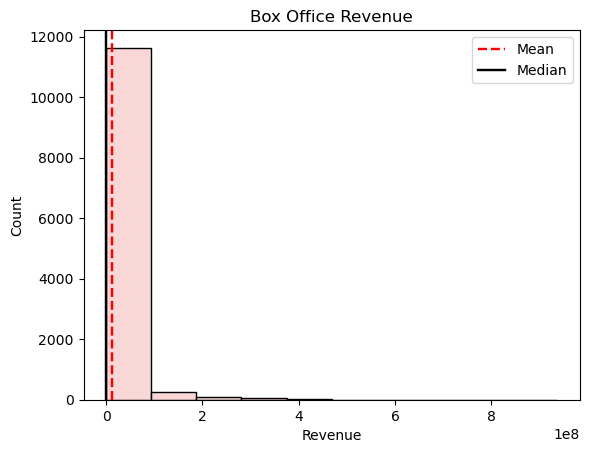

In [218]:
x=revised_df['Box_Office']
fig, ax = plt.subplots()
sns.histplot(
    data=revised_df['Box_Office'],
    bins=10,
    color='#F7CAC9',
    ax=ax)
plt.axvline(x.mean(), color='red',label='Mean', ls='--', lw=1.75)
plt.axvline(x.median(),color='black', label='Median', lw=1.75)
plt.title('Box Office Revenue')
plt.xlabel('Revenue')
#ax.set_xlim(0,80000)
plt.legend()
plt.show()

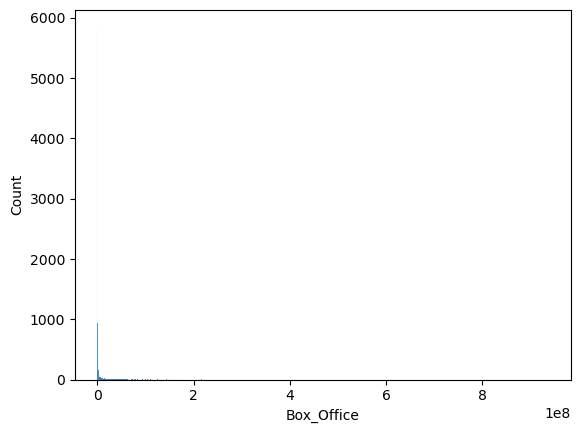

In [219]:
sns.histplot(revised_df['Box_Office'])
plt.show()

In [220]:
# our box office numbers have not been adjusted for inflation, so let's try to fix that

In [191]:
# using the cpi library
# pip install cpi

     ---------------------------------------- 29.8/29.8 MB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [192]:
import cpi

In [221]:
# testing how this works
cpi.inflate(100, 2000)

157.35772357723582

In [222]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12026 entries, 0 to 12653
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdbID        12026 non-null  object 
 1   Title         12026 non-null  object 
 2   Year          12026 non-null  int32  
 3   Month         12026 non-null  object 
 4   Box_Office    12026 non-null  float64
 5   IMDB_Value    12026 non-null  float64
 6   RT_Value      12026 non-null  float64
 7   MC_Value      12026 non-null  float64
 8   Vote_Average  12026 non-null  float64
 9   Rated         12026 non-null  object 
 10  Director      12026 non-null  object 
 11  Language      12026 non-null  object 
 12  Country       12026 non-null  object 
 13  Runtime       12026 non-null  float64
 14  Actor_1       12026 non-null  object 
 15  Actor_2       12026 non-null  object 
 16  Actor_3       12026 non-null  object 
 17  Genre_1       12026 non-null  object 
 18  Genre_2       12026 non-nu

In [200]:
# revised_df['Year'] = revised_df['Year'].astype(int)

In [224]:
revised_df['Adj_Box_Office'] = revised_df.apply(lambda x: cpi.inflate(x['Box_Office'], x['Year']), axis=1)

C:\Users\annie\AppData\Local\Temp\ipykernel_37548\1111498322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revised_df['Adj_Box_Office'] = revised_df.apply(lambda x: cpi.inflate(x['Box_Office'], x['Year']), axis=1)


In [230]:
revised_df[['Year','Box_Office', 'Adj_Box_Office']]

,Year,Box_Office,Adj_Box_Office
0,2007,36605602.0,4.783893e+07
1,2007,15589393.0,2.037338e+07
2,2006,51708.0,6.950058e+04
3,2007,8135024.0,1.063146e+07
4,2007,61356221.0,8.018489e+07
...,...,...,...
12646,2007,1585807.0,2.072451e+06
12647,2018,316103.0,3.411073e+05
12651,2008,13809609.0,1.738011e+07
12652,2008,49864.0,6.275643e+04


In [231]:
print(cpi.inflate(36605602, 2007))

47838932.652043484


In [232]:
print(cpi.inflate(51708.0, 2006))

69500.57916666668


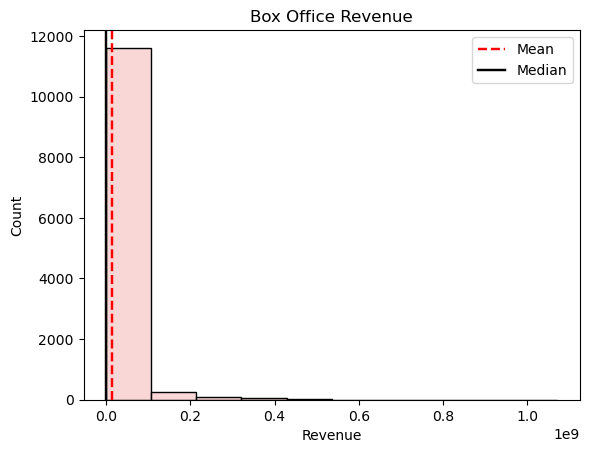

In [235]:
x=revised_df['Adj_Box_Office']
fig, ax = plt.subplots()
sns.histplot(
    data=revised_df['Adj_Box_Office'],
    bins=10,
    color='#F7CAC9',
    ax=ax)
plt.axvline(x.mean(), color='red',label='Mean', ls='--', lw=1.75)
plt.axvline(x.median(),color='black', label='Median', lw=1.75)
plt.title('Box Office Revenue')
plt.xlabel('Revenue')
#ax.set_xlim(0,80000)
plt.legend()
plt.show()

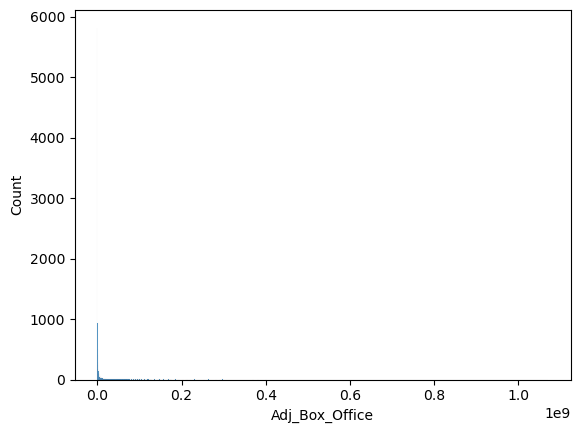

In [236]:
sns.histplot(revised_df['Adj_Box_Office'])
plt.show()

In [237]:
revised_df.describe()

,Year,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Runtime,Awards,Nominations,Adj_Box_Office
count,12026.000000,1.202600e+04,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000,1.202600e+04
mean,2012.898969,1.192840e+07,62.376950,61.545664,59.027969,61.808856,103.048395,0.022535,0.057875,1.409906e+07
std,3.432222,4.198833e+07,10.209456,22.991074,14.653951,10.088582,21.640056,0.248554,0.630725,4.926450e+07
min,2005.000000,1.200000e+01,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.371902e+01
25%,2010.000000,4.391900e+04,57.000000,50.000000,51.000000,56.450000,91.000000,0.000000,0.000000,5.106324e+04
50%,2013.000000,3.357785e+05,64.000000,63.000000,60.475000,62.660000,100.000000,0.000000,0.000000,3.963220e+05
75%,2016.000000,3.454458e+06,70.000000,78.000000,69.000000,68.420000,113.000000,0.000000,0.000000,4.035204e+06
max,2018.000000,9.366622e+08,91.000000,100.000000,100.000000,100.000000,339.000000,8.000000,14.000000,1.070840e+09


In [248]:
# let's see where these box office outliers are
rev_outliers = revised_df.loc[revised_df['Adj_Box_Office'] > 4035204]

In [250]:
rev_outliers = rev_outliers[['imdbID','Title','Year','Adj_Box_Office']]

In [273]:
rev_outliers.describe()

,Year,Adj_Box_Office
count,3007.000000,3.007000e+03
mean,2012.450615,5.466951e+07
std,3.444475,8.666562e+07
min,2006.000000,4.036473e+06
25%,2009.000000,8.768771e+06
50%,2013.000000,2.249584e+07
75%,2015.000000,6.110528e+07
max,2018.000000,1.070840e+09


In [284]:
rev_outliers.loc[rev_outliers['Adj_Box_Office'] > 500000000]

,imdbID,Title,Year,Adj_Box_Office
342,tt0468569,The Dark Knight,2008,6.712428e+08
865,tt1055369,Transformers: Revenge of the Fallen,2009,5.078856e+08
1085,tt0499549,Avatar,2009,9.469888e+08
1322,tt0435761,Toy Story 3,2010,5.157110e+08
2023,tt0848228,The Avengers,2012,7.356956e+08
2170,tt1345836,The Dark Knight Rises,2012,5.288999e+08
4159,tt0369610,Jurassic World,2015,7.457093e+08
4433,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,1.070840e+09
4436,tt2395427,Avengers: Age of Ultron,2015,5.247591e+08
4442,tt1825683,Black Panther,2018,7.554355e+08


In [ ]:
# let's see if dropping these makes a difference

In [286]:
rev_outliers = revised_df.loc[revised_df['Adj_Box_Office'] < 500000000]

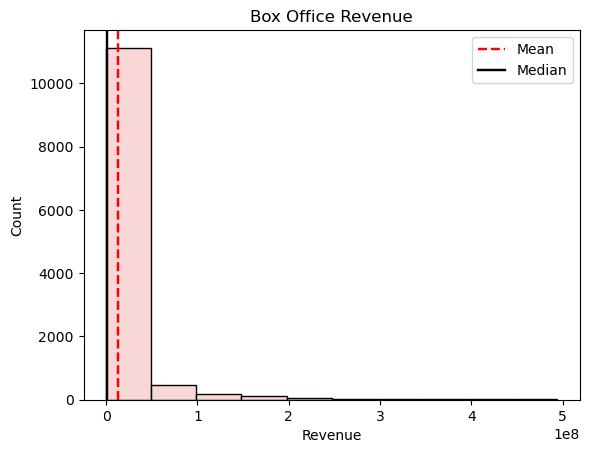

In [288]:
x=rev_outliers['Adj_Box_Office']
fig, ax = plt.subplots()
sns.histplot(
    data=rev_outliers['Adj_Box_Office'],
    bins=10,
    color='#F7CAC9',
    ax=ax)
plt.axvline(x.mean(), color='red',label='Mean', ls='--', lw=1.75)
plt.axvline(x.median(),color='black', label='Median', lw=1.75)
plt.title('Box Office Revenue')
plt.xlabel('Revenue')
#ax.set_xlim(0,80000)
plt.legend()
plt.show()

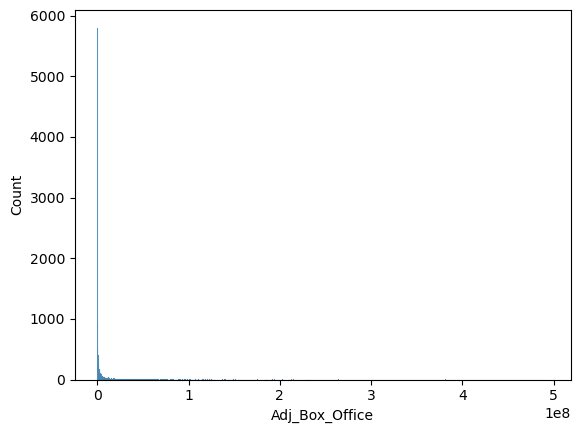

In [287]:
sns.histplot(rev_outliers['Adj_Box_Office'])
plt.show()

In [ ]:
# no real difference, so let's keep them in and do a log transformation 

In [289]:
revised_df['Log_Box_Office'] = np.log(revised_df['Adj_Box_Office'])

C:\Users\annie\AppData\Local\Temp\ipykernel_37548\2402010134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revised_df['Log_Box_Office'] = np.log(revised_df['Adj_Box_Office'])


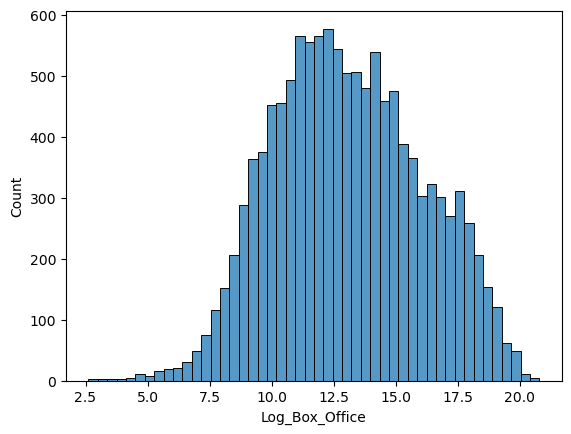

In [290]:
sns.histplot(revised_df['Log_Box_Office'])
plt.show()

In [291]:
# exporting cleaned dataframe
revised_df.to_csv('cleaned_df_1999.csv', index=False)

### Country Cleaning

In [717]:
# Load dataset
revised_df = pd.read_csv('cleaned_df_1999.csv')

In [718]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdbID          12026 non-null  object 
 1   Title           12026 non-null  object 
 2   Year            12026 non-null  int64  
 3   Month           12026 non-null  int64  
 4   Box_Office      12026 non-null  float64
 5   IMDB_Value      12026 non-null  float64
 6   RT_Value        12026 non-null  float64
 7   MC_Value        12026 non-null  float64
 8   Vote_Average    12026 non-null  float64
 9   Rated           12026 non-null  object 
 10  Director        12026 non-null  object 
 11  Language        12026 non-null  object 
 12  Country         12026 non-null  object 
 13  Runtime         12026 non-null  float64
 14  Actor_1         12026 non-null  object 
 15  Actor_2         12026 non-null  object 
 16  Actor_3         12026 non-null  object 
 17  Genre_1         12026 non-null 

In [719]:
revised_df['Country'].unique()

array(['Germany', 'United States', 'France', 'Czech Republic',
       'United Kingdom', 'Hong Kong', 'India', 'Canada', 'Sweden',
       'Unknown', 'New Zealand', 'Australia', 'Finland', 'Romania',
       'Taiwan', 'Israel', 'Belgium', 'Brazil', 'Russia', 'Argentina',
       'Spain', 'China', 'South Korea', 'Ireland', 'Austria', 'Iceland',
       'Mexico', 'Italy', 'Denmark', 'Poland', 'Japan', 'Thailand',
       'Turkey', 'USA', 'Netherlands', 'Norway', 'Serbia', 'Kazakhstan',
       'Hungary', 'South Africa', 'Colombia', 'Uruguay', 'Estonia',
       'Puerto Rico', 'Switzerland', 'Bulgaria', 'Greece', 'Indonesia',
       'Iran', 'Chile', 'Slovenia', 'Portugal', 'Philippines', 'Iraq',
       'United Arab Emirates', 'Bosnia and Herzegovina', 'Peru',
       'The Democratic Republic of Congo', 'Georgia',
       'Occupied Palestinian Territory', 'Saudi Arabia', 'Latvia',
       'Lithuania', 'Lebanon', 'Singapore', 'Egypt', 'Nigeria',
       'Paraguay', 'Bahamas', 'Cambodia', 'Morocco', 'Uk

In [720]:
revised_df.loc[revised_df['Country'] == 'USA', 'Country'] = 'United States'

### Genre Cleaning

In [721]:
# looking at genres
revised_df['Genre_1'].unique()

array(['Crime', 'Adventure', 'Drama', 'Action', 'Comedy', 'Mystery',
       'Romance', 'Animation', 'Science Fiction', 'Thriller', 'Horror',
       'Family', 'Music', 'Fantasy', 'Documentary', 'History', 'Western',
       'Unknown', 'War', 'TV Movie'], dtype=object)

In [722]:
revised_df['Genre_2'].unique()

array(['Drama', 'Animation', 'War', 'Comedy', 'Music', 'Fantasy',
       'Horror', 'Action', 'Thriller', 'Unknown', 'Adventure',
       'Science Fiction', 'Romance', 'Mystery', 'Crime', 'Family',
       'History', 'Documentary', 'Western', 'TV Movie'], dtype=object)

In [723]:
revised_df['Genre_3'].unique()

array(['Unknown', 'Comedy', 'Crime', 'Animation', 'Thriller', 'Family',
       'Romance', 'Horror', 'Adventure', 'Fantasy', 'Mystery', 'War',
       'Drama', 'Science Fiction', 'Action', 'Music', 'Western',
       'History', 'Documentary', 'TV Movie'], dtype=object)

In [724]:
# dropping unknown genres, documentaries & tv movies

In [725]:
# dropping documentaries
revised_df.loc[revised_df['Genre_1'] == 'Documentary']

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations,Adj_Box_Office,Log_Box_Office
77,tt0874423,Zoo,2007,1,69770.0,56.0,60.0,63.00,50.00,Unrated,...,Coyote,Jenny Edwards,John Edwards,Documentary,Unknown,Unknown,0.0,0.0,9.118064e+04,11.420598
88,tt0386032,Sicko,2007,5,24540079.0,80.0,91.0,74.00,73.71,PG-13,...,Michael Moore,Tucker Albrizzi,Tony Benn,Documentary,Comedy,Drama,0.0,0.0,3.207081e+07,17.283457
119,tt0488508,The Call of Wild,2007,6,833532.0,69.0,61.0,64.00,65.00,G,...,Queen Latifah,Katrina Agate,Zain Ali,Documentary,Family,Unknown,0.0,0.0,1.089322e+06,13.901066
140,tt0923752,The King of Kong: A Fistful of Quarters,2007,3,677914.0,80.0,97.0,83.00,77.96,PG-13,...,Steve Wiebe,Billy Mitchell,Mark Alpiger,Documentary,Unknown,Unknown,0.0,0.0,8.859486e+05,13.694414
151,tt0912593,No End in Sight,2007,7,1433319.0,82.0,96.0,89.00,76.62,Not Rated,...,Campbell Scott,Gerald Burke,Ali Fadhil,Documentary,Unknown,Unknown,0.0,0.0,1.873168e+06,14.443142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,tt6091332,Future Baby,2016,4,3360.0,62.0,67.0,67.00,67.00,TV-PG,...,Unknown,Unknown,Unknown,Documentary,Unknown,Unknown,0.0,0.0,3.793469e+03,8.241036
11958,tt9615068,In Touch,2018,11,2037.0,72.0,0.0,0.00,0.00,Unknown,...,Unknown,Unknown,Unknown,Documentary,Unknown,Unknown,0.0,0.0,2.198130e+03,7.695362
11965,tt2721510,Behind the White Glasses,2015,9,2223.0,73.0,57.0,53.00,53.00,Unknown,...,Lina Wertmüller,John Simon,Massimo Wertmüller,Documentary,Unknown,Unknown,0.0,0.0,2.541448e+03,7.840489
11986,tt6453158,Scotch: A Golden Dream,2018,4,16934.0,75.0,67.0,72.22,72.22,Not Rated,...,Unknown,Unknown,Unknown,Documentary,Unknown,Unknown,0.0,0.0,1.827351e+04,9.813208


In [726]:
revised_df.loc[revised_df['Genre_1'] == 'Documentary']

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations,Adj_Box_Office,Log_Box_Office
77,tt0874423,Zoo,2007,1,69770.0,56.0,60.0,63.00,50.00,Unrated,...,Coyote,Jenny Edwards,John Edwards,Documentary,Unknown,Unknown,0.0,0.0,9.118064e+04,11.420598
88,tt0386032,Sicko,2007,5,24540079.0,80.0,91.0,74.00,73.71,PG-13,...,Michael Moore,Tucker Albrizzi,Tony Benn,Documentary,Comedy,Drama,0.0,0.0,3.207081e+07,17.283457
119,tt0488508,The Call of Wild,2007,6,833532.0,69.0,61.0,64.00,65.00,G,...,Queen Latifah,Katrina Agate,Zain Ali,Documentary,Family,Unknown,0.0,0.0,1.089322e+06,13.901066
140,tt0923752,The King of Kong: A Fistful of Quarters,2007,3,677914.0,80.0,97.0,83.00,77.96,PG-13,...,Steve Wiebe,Billy Mitchell,Mark Alpiger,Documentary,Unknown,Unknown,0.0,0.0,8.859486e+05,13.694414
151,tt0912593,No End in Sight,2007,7,1433319.0,82.0,96.0,89.00,76.62,Not Rated,...,Campbell Scott,Gerald Burke,Ali Fadhil,Documentary,Unknown,Unknown,0.0,0.0,1.873168e+06,14.443142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,tt6091332,Future Baby,2016,4,3360.0,62.0,67.0,67.00,67.00,TV-PG,...,Unknown,Unknown,Unknown,Documentary,Unknown,Unknown,0.0,0.0,3.793469e+03,8.241036
11958,tt9615068,In Touch,2018,11,2037.0,72.0,0.0,0.00,0.00,Unknown,...,Unknown,Unknown,Unknown,Documentary,Unknown,Unknown,0.0,0.0,2.198130e+03,7.695362
11965,tt2721510,Behind the White Glasses,2015,9,2223.0,73.0,57.0,53.00,53.00,Unknown,...,Lina Wertmüller,John Simon,Massimo Wertmüller,Documentary,Unknown,Unknown,0.0,0.0,2.541448e+03,7.840489
11986,tt6453158,Scotch: A Golden Dream,2018,4,16934.0,75.0,67.0,72.22,72.22,Not Rated,...,Unknown,Unknown,Unknown,Documentary,Unknown,Unknown,0.0,0.0,1.827351e+04,9.813208


In [727]:
revised_df.loc[revised_df['Genre_1'] == 'TV Movie']

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations,Adj_Box_Office,Log_Box_Office
1337,tt1117646,The Special Relationship,2010,5,106027.0,67.0,83.00,65.28,65.28,TV-14,...,Michael Sheen,Demetri Goritsas,Adam Godley,TV Movie,Drama,History,0.0,0.0,131755.770032,11.788705
4252,tt3002578,König von Deutschland,2013,9,204932.0,59.0,58.47,58.47,58.47,Unknown,...,Olli Dittrich,Veronica Ferres,Wanja Mues,TV Movie,Comedy,Unknown,0.0,0.0,238371.991569,12.381588
9323,tt6540078,The Child in Time,2018,7,39221.0,61.0,79.00,58.69,58.69,Not Rated,...,Benedict Cumberbatch,Kelly Macdonald,Stephen Campbell Moore,TV Movie,Drama,Unknown,0.0,0.0,42323.449247,10.653097


In [728]:
def drop_genre_full(genre):
    drop_docs = revised_df.loc[revised_df['Genre_1'] == genre].index
    revised_df.drop(drop_docs, inplace=True)
    drop_docs = revised_df.loc[revised_df['Genre_2'] == genre].index
    revised_df.drop(drop_docs, inplace=True)
    drop_docs = revised_df.loc[revised_df['Genre_3'] == genre].index
    revised_df.drop(drop_docs, inplace=True)
    return

In [729]:
drop_genre_full('Documentary')

In [730]:
drop_genre_full('TV Movie')

In [731]:
revised_df.loc[revised_df['Genre_1'] == 'TV Movie']

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations,Adj_Box_Office,Log_Box_Office


In [732]:
revised_df.loc[revised_df['Genre_1'] == 'Documentary']

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations,Adj_Box_Office,Log_Box_Office


In [733]:
# unknown genres
revised_df.loc[revised_df['Genre_1'] == 'Unknown']

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations,Adj_Box_Office,Log_Box_Office
363,tt1068658,Le premier venu,2008,4,231642.0,55.0,46.00,46.00,46.00,Unknown,...,Clémentine Beaugrand,Gérald Thomassin,Guillaume Saurrel,Unknown,Unknown,Unknown,0.0,0.0,291533.479515,12.582910
749,tt1164092,Praying with Lior,2008,6,82553.0,76.0,78.00,68.00,0.00,Unrated,...,Lior Liebling,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,103897.235106,11.551158
1384,tt1513713,Love in Another Language,2009,12,638321.0,73.0,72.00,72.00,72.00,Unknown,...,Mert Firat,Saadet Aksoy,Lale Mansur,Unknown,Unknown,Unknown,0.0,0.0,806228.489118,13.600122
1488,tt1009014,J.C. Chávez,2007,5,216421.0,61.0,51.25,51.25,51.25,Unknown,...,Bob Arum,Julio Cesar Chavez,Julio César Chávez Jr.,Unknown,Unknown,Unknown,0.0,0.0,282835.114786,12.552619
1738,tt0847221,Streetballers,2009,8,28642.0,56.0,45.00,45.00,45.00,R,...,Jimmy McKinney,Matt Krentz,Adrieanne Perez,Unknown,Unknown,Unknown,0.0,0.0,36176.150221,10.496155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11416,tt0875580,Unexpected Things,2007,3,586505.0,50.0,41.67,41.67,41.67,R,...,Alejandro Tommasi,Marcela Guirado,Mar Carrera,Unknown,Unknown,Unknown,0.0,0.0,766488.506188,13.549575
11678,tt4780446,Le Caravage,2015,10,37637.0,53.0,52.00,52.00,52.00,Unknown,...,Bartabas,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,43028.550231,10.669619
11804,tt5325030,My Art,2016,9,12554.0,42.0,61.00,53.00,50.00,Unknown,...,Blair Brown,Robert Clohessy,Grace Dunham,Unknown,Unknown,Unknown,0.0,0.0,14173.575687,9.559135
11884,tt1873536,Arriya,2011,8,67752.0,50.0,0.00,0.00,0.00,Unknown,...,Ramón Agirre,Javi Alaiza,Joseba Apaolaza,Unknown,Unknown,Unknown,0.0,0.0,81616.613571,11.309788


In [734]:
# dropping unknown
# not using above function as we don' twant to drop the unknown genre 2 & 3 yet
drop_unknown = revised_df.loc[revised_df['Genre_1'] == 'Unknown'].index
revised_df.drop(drop_unknown, inplace=True)
revised_df.loc[revised_df['Genre_1'] == 'Unknown']

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Actor_1,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations,Adj_Box_Office,Log_Box_Office


In [735]:
# we'll use genre 2 & 3 to fill in any gaps for adjusting later, so let's try to reduce the amount of unknowns in genre 2

In [736]:
revised_df.loc[revised_df['Genre_2'] == 'Unknown', 'Genre_2'] = revised_df['Genre_3']

In [737]:
revised_df['Genre_1'].unique()

array(['Crime', 'Adventure', 'Drama', 'Action', 'Comedy', 'Mystery',
       'Romance', 'Animation', 'Science Fiction', 'Thriller', 'Horror',
       'Family', 'Music', 'Fantasy', 'History', 'Western', 'War'],
      dtype=object)

genres we want to adjust:
- action (merge with adventure)
- adventure (merge with action)
- crime
- mystery
- animation
- science fiction (merge with fantasy)
- fantasy (merge with science fiction)
- history
- thriller (merge with horror)
- horror (merge with thriller)

In [740]:
def genre_merge(genre1, genre2, new_name):
    revised_df.loc[revised_df['Genre_1'] == genre1, 'Genre_1'] = new_name
    revised_df.loc[revised_df['Genre_2'] == genre1, 'Genre_2'] = new_name
    revised_df.loc[revised_df['Genre_3'] == genre1, 'Genre_3'] = new_name
    revised_df.loc[revised_df['Genre_1'] == genre2, 'Genre_1'] = new_name
    revised_df.loc[revised_df['Genre_2'] == genre2, 'Genre_2'] = new_name
    revised_df.loc[revised_df['Genre_3'] == genre2, 'Genre_3'] = new_name
    return    

In [739]:
revised_df['Genre_1'].unique()

array(['Crime', 'Adventure', 'Drama', 'Action', 'Comedy', 'Mystery',
       'Romance', 'Animation', 'Science Fiction', 'Thriller', 'Horror',
       'Family', 'Music', 'Fantasy', 'History', 'Western', 'War'],
      dtype=object)

In [743]:
genre_merge('Action','Adventure','Action/Adventure')
genre_merge('Science Fiction','Fantasy','Sci-Fi/Fantasy')
genre_merge('Thriller','Horror','Thriller/Horror')

In [744]:
revised_df['Genre_1'].unique()

array(['Crime', 'Action/Adventure', 'Drama', 'Comedy', 'Mystery',
       'Romance', 'Animation', 'Sci-Fi/Fantasy', 'Thriller/Horror',
       'Family', 'Music', 'History', 'Western', 'War'], dtype=object)

In [745]:
def drop_genre_unknown(genre):
    # dropping movies that have an unknown secondary genre in combination with a genre we want to drop
    drop_list = revised_df.loc[(revised_df['Genre_1'] == genre) & (revised_df['Genre_2'] == 'Unknown')].index
    revised_df.drop(drop_list, inplace=True)
    return

In [746]:
drop_genre_unknown('Crime')
drop_genre_unknown('History')
drop_genre_unknown('Mystery')
drop_genre_unknown('Animation')

In [747]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557 entries, 0 to 12025
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdbID          10557 non-null  object 
 1   Title           10557 non-null  object 
 2   Year            10557 non-null  int64  
 3   Month           10557 non-null  int64  
 4   Box_Office      10557 non-null  float64
 5   IMDB_Value      10557 non-null  float64
 6   RT_Value        10557 non-null  float64
 7   MC_Value        10557 non-null  float64
 8   Vote_Average    10557 non-null  float64
 9   Rated           10557 non-null  object 
 10  Director        10557 non-null  object 
 11  Language        10557 non-null  object 
 12  Country         10557 non-null  object 
 13  Runtime         10557 non-null  float64
 14  Actor_1         10557 non-null  object 
 15  Actor_2         10557 non-null  object 
 16  Actor_3         10557 non-null  object 
 17  Genre_1         10557 non-null 

In [748]:
revised_df.loc[revised_df['Genre_1'] == 'Crime', 'Genre_1'] = revised_df['Genre_2']

In [749]:
revised_df.loc[revised_df['Genre_1'] == 'History', 'Genre_1'] = revised_df['Genre_2']

In [750]:
revised_df.loc[revised_df['Genre_1'] == 'Mystery', 'Genre_1'] = revised_df['Genre_2']

In [751]:
# running the above again but switching to genre 3 to catch any overlaps, and dropping anything remaining

In [752]:
revised_df.loc[revised_df['Genre_1'] == 'Crime', 'Genre_1'] = revised_df['Genre_3']
revised_df.loc[revised_df['Genre_1'] == 'History', 'Genre_1'] = revised_df['Genre_3']
revised_df.loc[revised_df['Genre_1'] == 'Mystery', 'Genre_1'] = revised_df['Genre_3']
revised_df.loc[revised_df['Genre_1'] == 'Animation', 'Genre_1'] = revised_df['Genre_3']

In [753]:
def drop_genre(genre):
    # only drops values based on their primary genre
    drop_docs = revised_df.loc[revised_df['Genre_1'] == genre].index
    revised_df.drop(drop_docs, inplace=True)

In [754]:
drop_genre('Crime')
drop_genre('History')
drop_genre('Mystery')
drop_genre('Animation')
drop_genre('Unknown')

In [755]:
revised_df['Genre_1'].unique()

array(['Drama', 'Action/Adventure', 'Comedy', 'Thriller/Horror',
       'Romance', 'Family', 'Sci-Fi/Fantasy', 'Music', 'Western', 'War'],
      dtype=object)

In [756]:
# these are more maneagable now

In [757]:
print(len(revised_df['Genre_1'].unique()))

10


In [758]:
# checking number of films per genre
revised_df.groupby('Genre_1').count()

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Runtime,Actor_1,Actor_2,Actor_3,Genre_2,Genre_3,Awards,Nominations,Adj_Box_Office,Log_Box_Office
Genre_1,,,,,,,,,,,,,,,,,,,,,
Action/Adventure,1516,1516,1516,1516,1516,1516,1516,1516,1516,1516,...,1516,1516,1516,1516,1516,1516,1516,1516,1516,1516
Comedy,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,...,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497
Drama,3938,3938,3938,3938,3938,3938,3938,3938,3938,3938,...,3938,3938,3938,3938,3938,3938,3938,3938,3938,3938
Family,215,215,215,215,215,215,215,215,215,215,...,215,215,215,215,215,215,215,215,215,215
Music,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
Romance,418,418,418,418,418,418,418,418,418,418,...,418,418,418,418,418,418,418,418,418,418
Sci-Fi/Fantasy,347,347,347,347,347,347,347,347,347,347,...,347,347,347,347,347,347,347,347,347,347
Thriller/Horror,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355,...,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355
War,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102


looks like most movies are action/adventure, comedy, drama, or thriller/horror. so let's set these as the primary genre, and then assign new secondary genres

In [759]:
revised_df.loc[revised_df['Genre_1'] == 'Action/Adventure', 'Genre'] = revised_df['Genre_1']
revised_df.loc[revised_df['Genre_1'] == 'Comedy', 'Genre'] = revised_df['Genre_1']
revised_df.loc[revised_df['Genre_1'] == 'Drama', 'Genre'] = revised_df['Genre_1']
revised_df.loc[revised_df['Genre_1'] == 'Thriller/Horror', 'Genre'] = revised_df['Genre_1']

In [760]:
# assigning action/adventure movies based on secondary genres
revised_df.loc[(revised_df['Genre_1'] != 'Action/Adventure') & 
               (revised_df['Genre_1'] != 'Comedy') &
               (revised_df['Genre_1'] != 'Drama') &
               (revised_df['Genre_2'] == 'Action/Adventure'), 'Genre'] = 'Action/Adventure'

In [761]:
# assigning comedy based on secondary genres
revised_df.loc[(revised_df['Genre_1'] != 'Action/Adventure') & 
               (revised_df['Genre_1'] != 'Comedy') &
               (revised_df['Genre_1'] != 'Drama') &
               (revised_df['Genre_2'] == 'Comedy'), 'Genre'] = 'Comedy'

In [762]:
# assigning drama movies based on secondary genres
revised_df.loc[(revised_df['Genre_1'] != 'Action/Adventure') & 
               (revised_df['Genre_1'] != 'Comedy') &
               (revised_df['Genre_1'] != 'Drama') &
               (revised_df['Genre_2'] == 'Drama'), 'Genre'] = 'Drama'

In [763]:
# assigning thriller/horror movies based on secondary genres
revised_df.loc[(revised_df['Genre_1'] != 'Action/Adventure') & 
               (revised_df['Genre_1'] != 'Comedy') &
               (revised_df['Genre_1'] != 'Drama') &
               (revised_df['Genre_2'] == 'Thriller/Horror'), 'Genre'] = 'Thriller/Horror'

In [764]:
# looping through while looking at tertiary genres
revised_df.loc[(revised_df['Genre_1'] != 'Action/Adventure') & 
               (revised_df['Genre_1'] != 'Comedy') &
               (revised_df['Genre_1'] != 'Drama') &
               (revised_df['Genre_3'] == 'Action/Adventure'), 'Genre'] = 'Action/Adventure'

revised_df.loc[(revised_df['Genre_1'] != 'Action/Adventure') & 
               (revised_df['Genre_1'] != 'Comedy') &
               (revised_df['Genre_1'] != 'Drama') &
               (revised_df['Genre_3'] == 'Comedy'), 'Genre'] = 'Comedy'

revised_df.loc[(revised_df['Genre_1'] != 'Action/Adventure') & 
               (revised_df['Genre_1'] != 'Comedy') &
               (revised_df['Genre_1'] != 'Drama') &
               (revised_df['Genre_3'] == 'Drama'), 'Genre'] = 'Drama'

revised_df.loc[(revised_df['Genre_1'] != 'Action/Adventure') & 
               (revised_df['Genre_1'] != 'Comedy') &
               (revised_df['Genre_1'] != 'Drama') &
               (revised_df['Genre_3'] == 'Thriller/Horror'), 'Genre'] = 'Thriller/Horror'

In [765]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10495 entries, 0 to 12025
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdbID          10495 non-null  object 
 1   Title           10495 non-null  object 
 2   Year            10495 non-null  int64  
 3   Month           10495 non-null  int64  
 4   Box_Office      10495 non-null  float64
 5   IMDB_Value      10495 non-null  float64
 6   RT_Value        10495 non-null  float64
 7   MC_Value        10495 non-null  float64
 8   Vote_Average    10495 non-null  float64
 9   Rated           10495 non-null  object 
 10  Director        10495 non-null  object 
 11  Language        10495 non-null  object 
 12  Country         10495 non-null  object 
 13  Runtime         10495 non-null  float64
 14  Actor_1         10495 non-null  object 
 15  Actor_2         10495 non-null  object 
 16  Actor_3         10495 non-null  object 
 17  Genre_1         10495 non-null 

In [670]:
# now assigning new secondary genres

In [672]:
def sub_genre(genre):
    revised_df.loc[(revised_df['Genre'] == genre) & 
               (revised_df['Genre_1'] != genre), 'Sub_Genre'] = revised_df['Genre_1']
    return    

In [766]:
sub_genre('Action/Adventure')
sub_genre('Comedy')
sub_genre('Drama')
sub_genre('Thriller/Horror')

In [767]:
# catching anything leftover
revised_df['Sub_Genre'].fillna(revised_df['Genre_2'], inplace=True)
revised_df['Sub_Genre'].fillna(revised_df['Genre_3'], inplace=True)
# anything that somehow is left afterwards, will be labelled unknown
revised_df['Sub_Genre'].fillna('Unknown', inplace=True)

In [774]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10495 entries, 0 to 12025
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdbID          10495 non-null  object 
 1   Title           10495 non-null  object 
 2   Year            10495 non-null  int64  
 3   Month           10495 non-null  int64  
 4   Box_Office      10495 non-null  float64
 5   IMDB_Value      10495 non-null  float64
 6   RT_Value        10495 non-null  float64
 7   MC_Value        10495 non-null  float64
 8   Vote_Average    10495 non-null  float64
 9   Rated           10495 non-null  object 
 10  Director        10495 non-null  object 
 11  Language        10495 non-null  object 
 12  Country         10495 non-null  object 
 13  Runtime         10495 non-null  float64
 14  Actor_1         10495 non-null  object 
 15  Actor_2         10495 non-null  object 
 16  Actor_3         10495 non-null  object 
 17  Genre_1         10495 non-null 

In [776]:
# we'll just drop anything that didn't make it
drop_list = revised_df.loc[revised_df['Genre'].isna()].index

In [777]:
revised_df.drop(drop_list, inplace=True)

In [780]:
revised_df.groupby(['Genre']).count()

,imdbID,Title,Year,Month,Box_Office,IMDB_Value,RT_Value,MC_Value,Vote_Average,Rated,...,Actor_2,Actor_3,Genre_1,Genre_2,Genre_3,Awards,Nominations,Adj_Box_Office,Log_Box_Office,Sub_Genre
Genre,,,,,,,,,,,,,,,,,,,,,
Action/Adventure,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839,...,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839
Comedy,2819,2819,2819,2819,2819,2819,2819,2819,2819,2819,...,2819,2819,2819,2819,2819,2819,2819,2819,2819,2819
Drama,4624,4624,4624,4624,4624,4624,4624,4624,4624,4624,...,4624,4624,4624,4624,4624,4624,4624,4624,4624,4624
Thriller/Horror,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048


In [781]:
# exporting cleaned dataframe
revised_df.to_csv('cleaned_df_1998.csv', index=False)